In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [51]:
import trimesh
import numpy as np
mesh = trimesh.Trimesh(
    vertices = np.array([
        [0,0,0],
        [0,1,0],
        [0,0,1],
        [1,0,0],
    ]),
    edges = np.array([
        [0,1],
        [1,2],
        [2,0]
    ])
)
mesh

<trimesh.Trimesh(vertices.shape=(4, 3), faces.shape=(0, 3))>

In [52]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu

from neurd import neuron_visualizations as nviz
from pathlib import Path

In [53]:
segment_id = 864691134917511946

# Load the appropriate volume data inferface object

In [5]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [6]:
synapse_filepath = str(Path(f'./{segment_id}_synapses.csv').absolute())
synapse_filepath

'/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946_synapses.csv'

In [7]:
from datasci_tools import pandas_utils as pu
df = pu.csv_to_df(synapse_filepath)
df

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,864691134917511946,864691131890533202,74184144,postsyn,130294,142230,26219,440
1,864691134917511946,864691131971669827,75022036,postsyn,129722,172364,24745,8428
2,864691134917511946,864691132108273063,70508178,postsyn,129296,134025,26165,26588
3,864691134917511946,864691132292869029,104897939,postsyn,145174,190248,26715,4500
4,864691134917511946,864691132404296761,67503404,postsyn,126052,183560,25913,2396
...,...,...,...,...,...,...,...,...
2310,864691134917511946,864691137019576686,92314268,postsyn,136376,184538,26155,5916
2311,864691134917511946,864691137196931393,78527771,postsyn,130688,192222,24419,15896
2312,864691134917511946,864691137196956737,105192008,postsyn,143492,188714,25058,7820
2313,864691134917511946,864691137196956737,113437532,postsyn,147378,190346,25751,708


In [8]:
vdi.set_synapse_filepath(
    synapse_filepath
)

# Data Prep: Loading mesh

In [54]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(420741, 3), faces.shape=(865980, 3))>

In [10]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [11]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [12]:
decimation_parameters = dict(
    decimation_ratio = 0.25,
)

In [13]:
import time

st = time.time()
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

print(f"Total time = {time.time() - st}")

xvfb-run -n 9853 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_30126.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_30126_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/decimation_meshlab_25322339.mls
Total time = 30.450304985046387


In [14]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
}



# Step 2: Soma Identification

In [15]:
from neurd import soma_extraction_utils as sm

soma_extraction_parameters = dict(
    #max_n_mesh_facer = 100
)

In [16]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru

paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [17]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [18]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 9456 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_5398.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_5398_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_441096.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_5398.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_5398_remove_interior.off
/neurd_packages/NEURD/Applications/

  0%|          | 0/13 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.779125]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5994 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_650485.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_650485_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_947847.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_650485.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_650485_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_947847.mls is being deleted....
Inside sp

  0%|          | 0/1 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.5418655]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_554955.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/36_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_814443.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(2914, 3), faces.shape=(5824, 3))>
xvfb-run -n 858 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/de

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45577199999999995]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_100070.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0019230769230769232
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/568_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_466381.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #3: <trimesh.Trimesh(vertices.shape=(2561, 3), faces.shape=(5122, 3))>
xvfb-run -n 1377 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/d

  0%|          | 0/7 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #4: <trimesh.Trimesh(vertices.shape=(2505, 3), faces.shape=(5006, 3))>
xvfb-run -n 2021 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25697175.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(627, 3), faces.shape=(1250, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(627, 3), faces.shape=(1250

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45000850000000003]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_357866.mls is being deleted....
Inside sphere validater: ratio_val = 44.002011369429006
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(294, 3), faces.shape=(582, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/157_mesh 
clusters:3 
smoothness:0.2

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on mesh after poisson #5: <trimesh.Trimesh(vertices.shape=(2190, 3), faces.shape=(4376, 3))>
xvfb-run -n 7081 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25697175.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(549, 3), faces.shape=(1094, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(ve

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

----- working on mesh after poisson #6: <trimesh.Trimesh(vertices.shape=(2089, 3), faces.shape=(4174, 3))>
xvfb-run -n 1326 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25697175.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(523, 3), faces.shape=(1042, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(523, 3), faces.shape=(1042

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #7: <trimesh.Trimesh(vertices.shape=(2076, 3), faces.shape=(4148, 3))>
xvfb-run -n 8295 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25697175.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(1036, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(1036

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #8: <trimesh.Trimesh(vertices.shape=(1712, 3), faces.shape=(3420, 3))>
xvfb-run -n 5705 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25697175.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.548969]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_530681.mls is being deleted....
Inside sphere validater: ratio_val = 264.5780977148202
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(309, 3), faces.shape=(612, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0032679738562091504
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/36_mesh 
clusters:3 
smoothness:0.2

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

Could not find valid soma mesh in retry



 Total time for run = 153.30240845680237
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 8844 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_2309.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_2309_fill_holes.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/fill_holes_506579.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the 

  0%|          | 0/19 [00:00<?, ?it/s]

Largest hole before segmentation = 195442.17366895775, after = 578941.165186773,

ratio = 2.9622120667128398, difference = 383498.9915178153
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Not need to do a second pass because already found a soma


In [56]:
print(soma_products)

    glia_meshes:[]
    nuclei_meshes:[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces.shape=(3242, 3))>, <trimesh.Trimesh(vertices.shape=(1084, 3), faces.shape=(2887, 3))>, <trimesh.Trimesh(vertices.shape=(571, 3), faces.shape=(1352, 3))>, <trimesh.Trimesh

In [58]:
soma_products.glia_meshes

[]

In [60]:
from datasci_tools import ipyvolume_utils as ipvu 
ipvu.plot_objects(
    meshes = soma_products.soma_meshes,# + soma_products.nuclei_meshes,
    meshes_colors="random",
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [61]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 15


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [21]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [22]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 2b: Saving off pipeline products

In [23]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/products_up_to_soma_stage.pkl
File size is 23.115166 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:139770647056688
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:139770758127136
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:139770758110080
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:139770758097120
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:139770758080064
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:139770758095296
Cleared mesh: <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>:139770758107824
Cleared mesh: <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>:139770647057792
Cleared mesh: <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 

# Step 3: Decomposition

In [24]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = decimated_mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
soma_mesh_list_centers = [array([ 553544.98545949,  749839.54254837, 1047338.92563482])]
Getting Glia and Nuclei Pieces Subtracted Away 0.28909897804260254
 Splitting mesh after soma cancellation 2.014549732208252
# of split_meshes = 4
 Containing Mesh Indices 0.04279446601867676
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 1.3113021850585938e-05
There were 3 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.7162163257598877
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]}

  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/197064 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.90s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 4.548579931259155
connecting at the root
branches_touching_root = [26]
combining close nodes
combine_threshold = 700
length of Graph = 16119
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 26
empty_indices % = 0.0
 conflict_indices % = 0.0037420005192980313


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Decomposing first pass: 20.942967176437378
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [69442, 13222, 559, 4344, 39121, 7595, 8195, 5667, 4871, 10063, 6640, 14715, 6176]
mesh_large_connectivity: 0.5418498516082764
Finding MAP candidates connected components: 0.00021839141845703125
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.46325254440307617
Grouping MP Sublimbs by Graph: 0.11728072166442871
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.01783609390258789
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9319 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Sing

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.1338348388671875
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 70.09721374511719
Checking connected components after removing cycles
Total time for mesh KDTree = 2.3655402660369873
sbv[0].reshape(-1,3) = [[ 550001.9  743270.1 1043789. ]]
closest_sk_pt_coord BEFORE = [ 549745.  742897. 1045350.]
current_skeleton.shape = (4714, 2, 3)
node_for_stitch = 4515: [ 549745.  742897. 1045350.]
node_for_stitch AFTER = 4515: [ 549745.  742897. 1045350.]
possible_node_loc = [  28  293  340  387  504  923 1025 1177 1544 1547 1646 1721 1806 2024
 2110 2503 2542 2604 2720 2771 2777 2784 2856 2918 3125 3134 3148 3182
 3261 3280 3431 3474 3502 4193 4203 4502 4528 4653 4713]
possible_node_loc AFTER = [  28  293  340  387  504  923 1025 1177 1544 1547 1646 1721 1806 2024
 2110 2503 2542 2604 2720 2771 2777 2784 2856 2918 3125 3134 3148 3182
 3261

  0%|          | 0/32 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (4556, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 2 valid paths to replace
valid_paths = [array([1439., 1463., 1476.]), array([3973., 3992.])]
valid_path_lengths = [446.94967207097227, 331.09666262286606]
length of Graph = 4556
Working on path [1439. 1463. 1476.]
path_degrees = [3, 2, 3]
Working on path [3973. 3992.]
path_degrees = [3, 3]
node_degrees = [2 2 2 2 2 4]
skeletonize_and_clean_connected_branch_CGAL: 90.20636773109436
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2925 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_70032.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_70032_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/S

0it [00:00, ?it/s]

Total time for decomposition = 30.05447030067444
mesh_correspondence_first_pass: 30.054530143737793
Limb decomposed into 10 branches
divided_skeleton_graph_recovered = (4547, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (4547, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (9, 10)
empty_indices % = 0.2765279890876659
 conflict_indices % = 0.015812391794764177


  0%|          | 0/424 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 152.9642095565796
correspondence_1_to_1: 32.68542742729187
Total time for MAP sublimb processing 152.96428799629211
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01669144630432129
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02402019500732422
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02344989776611328
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.024019718170166016
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #4 ---

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1956512991106759
 conflict_indices % = 0.0023339727166637606


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.20657371279932676
 conflict_indices % = 0.008195623900237167


  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 3]
MP_branches_for_correspondence = [0 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [ 563290.32537776  726396.29725494 1040712.26167108]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [7]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3564441834431374
 conflict_indices % = 0.01115780587619974


  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 528048.23493116  738378.68018906 1076921.83034921]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.24934884528563986
 conflict_indices % = 0.005382878972043758


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.27615949709440446
 conflict_indices % = 0.015350316143415811


  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 544165.4049786   721897.99254932 1044831.71286521]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [6, 7, 10]
MAP_stitch_point_on_end_or_branch = True

Revising the MAP pieces index:
MAP_pieces_idx_touching_border = [6, 7], MAP_branches_with_stitch_point = [6, 7, 10]
MAP_pieces_for_correspondence = [6 7]


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.40294340336929774
 conflict_indices % = 0.010836645845163733


  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 515656.61063332  738420.63084309 1027362.50549421]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.20971015669400017
 conflict_indices % = 0.003369326946496712


  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.24568326452407563
 conflict_indices % = 0.013275244634018385


  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (5, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 552421.37615997  736725.93864965 1031610.1967896 ]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2569780908038099
 conflict_indices % = 0.0004490558010919146


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2563363428695747
 conflict_indices % = 0.004718263896442945


  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 539700.08052065  687414.11271422 1039892.58772448]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [10]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.20148520845384957
 conflict_indices % = 0.0003632303283871228


  0%|          | 0/173 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.22325586124158686
 conflict_indices % = 0.004351450822505541


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 0) 



Time for decomp of Limb = 292.39776158332825
Number of matching vertices = 89
Only one endpoint after filtering away the endpoints that are not on the skeleton


  0%|          | 0/1 [00:00<?, ?it/s]

Removed 1 skeletal branches


  0%|          | 0/28 [00:00<?, ?it/s]

392837 392838
For marked faces: None
empty_indices % = 0.0010691430055137232
 conflict_indices % = 0.0


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 554358.   749290.5 1039952. ]
Time for preparing soma vertices and root: 0.00019097328186035156
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/63606 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.35it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.8079574108123779
connecting at the root
branches_touching_root = [4]
combining close nodes
combine_threshold = 700
length of Graph = 4691
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.0027349400447391928


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Decomposing first pass: 6.73638653755188
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [40612, 23254, 4749, 29034]
mesh_large_connectivity: 0.06787705421447754
Finding MAP candidates connected components: 9.989738464355469e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0840909481048584
Grouping MP Sublimbs by Graph: 0.015140056610107422
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.00708770751953125
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8892 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /neurd_packages/NE

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/4 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.1502368450164795
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 60.428993463516235
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.30648350715637207
filter_end_node_length = 4000


  0%|          | 0/70 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2693, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 1 valid paths to replace
valid_paths = [array([1154., 1157., 1166.])]
valid_path_lengths = [306.5891283968768]
length of Graph = 2691
Working on path [1154. 1157. 1166.]
path_degrees = [3, 2, 3]
node_degrees = [2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 3]
node_degrees = [3 2 2 2 2 3 2 2 2 2 2 2]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 70.30234408378601
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8149 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_48234.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_48234_remove_interior.off -s /neurd_packages/NEURD/A

0it [00:00, ?it/s]

Total time for decomposition = 14.845471382141113
mesh_correspondence_first_pass: 14.845536708831787
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (2672, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2672, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.2732951694333787
 conflict_indices % = 0.008970906000061445


  0%|          | 0/318 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 89.9310450553894
correspondence_1_to_1: 4.776101350784302
Total time for MAP sublimb processing 89.93113589286804
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.003321409225463867
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.2329404354095459
sbv[0].reshape(-1,3) = [[ 554358.   749290.5 1039952. ]]
closest_sk_pt_coord BEFORE = [ 556602.02796298  748554.33839125 1033297.39006678]
current_skeleton.shape = (1207, 2, 3)
node_for_stitch = 1191: [ 556602.02796298  748554.33839125 1033297.39006678]
node_for_stitch AFTER = 1191: [ 556602.02796298  748554.33839125 1033297.39006678]
possible_node_loc = [346 945]
possible_node_loc AFTER = [346 945]
curr_shortest_path = [1191, 1194.0, 1196.0, 1199.0, 1201.0, 1203.0, 1206.0, 1207.0, 1205.0, 1204.0, 1202.0, 1200.0, 1198.0, 1197.0, 1195.0, 1193.0, 1192.0, 1190.0, 1188.0, 1186.0, 1184.0, 1183

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3020927170674243
 conflict_indices % = 0.007033469614025362


  0%|          | 0/70 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 316.74674188864907
curr_width_median = 847.5146335434672
curr_width_median = 1118.9098890171645
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 5.5128912925720215
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [1]
conn = [1]
winning_vertex = [ 550755.20472931  753610.13232065 1019827.00076467]
MP_branches_with_stitch_point = [1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2566905763047242
 conflict_indices % = 0.006554538708879545


  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2479481450346216
 conflict_indices % = 0.013229210450633808


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [1]
MP_branches_for_correspondence = [1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 116.65529894828796
Number of matching vertices = 49
Only one endpoint after filtering away the endpoints that are not on the skeleton


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 1 skeletal branches


  0%|          | 0/11 [00:00<?, ?it/s]

126510 126511
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 560775.   752816.8 1055182. ]
Time for preparing soma vertices and root: 0.00030040740966796875
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/44944 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.19it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.7494220733642578
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 4031
After combining close endpoints max(kept_branches_idx) = 14, len(kept_branches_idx) = 14
empty_indices % = 0.0
 conflict_indices % = 0.005704989637421167


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Decomposing first pass: 5.366056203842163
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1704, 3062, 35318]
mesh_large_connectivity: 0.023030519485473633
Finding MAP candidates connected components: 9.918212890625e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.10613346099853516
Grouping MP Sublimbs by Graph: 0.03143906593322754
Divinding into MP and MAP pieces: 1.430511474609375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.023257017135620117
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8583 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /neurd_packages/NEURD/Appl

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.1123502254486084
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 28.243486404418945
Checking connected components after removing cycles
Total time for mesh KDTree = 0.30486536026000977
sbv[0].reshape(-1,3) = [[ 560775.   752816.8 1055182. ]]
closest_sk_pt_coord BEFORE = [ 561314.  752477. 1055650.]
current_skeleton.shape = (1249, 2, 3)
node_for_stitch = 0: [ 561314.  752477. 1055650.]
node_for_stitch AFTER = 0: [ 561314.  752477. 1055650.]
possible_node_loc = [   0   54   68  166  224  233  238  251  301  318  345  373  464  477
  496  549  564  627  721  827  829  897  918 1006 1020 1047 1056 1125
 1202 1215 1249]
possible_node_loc AFTER = [   0   54   68  166  224  233  238  251  301  318  345  373  464  477
  496  549  564  627  721  827  829  897  918 1006 1020 1047 1056 1125
 1202 1215 1249]
curr_shortest_path = [0]
Current

  0%|          | 0/28 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1101, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 30.5544593334198
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7938 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_53057.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_53057_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_635093.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_53057.off
removed temporary outpu

0it [00:00, ?it/s]

Total time for decomposition = 6.664696455001831
mesh_correspondence_first_pass: 6.664726257324219
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1101, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1101, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.24603333000698532
 conflict_indices % = 0.01219938129927153


  0%|          | 0/130 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 40.57115292549133
correspondence_1_to_1: 3.3286211490631104
Total time for MAP sublimb processing 40.57122588157654
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01969170570373535
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 5]
conn = [0, 5]
winning_vertex = [ 562145.73810209  747810.29072226 1071042.77744516]
MP_branches_with_stitch_point = [0, 5]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3382869804400978
 conflict_indices % = 0.00542481662591687


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 5]
MP_branches_for_correspondence = [0 5]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 51.56624221801758
Number of matching vertices = 24
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/16 [00:00<?, ?it/s]

89781 89782
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 552945.2  757231.5 1044509. ]
Time for preparing soma vertices and root: 0.0003955364227294922
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/40475 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.132016897201538
branches_touching_root = [11]
combining close nodes
combine_threshold = 700
length of Graph = 8442
After combining close endpoints max(kept_branches_idx) = 42, len(kept_branches_idx) = 43
empty_indices % = 0.0
 conflict_indices % = 0.014541138066622153


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Decomposing first pass: 7.569835424423218
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.14984130859375e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0040740966796875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.029764652252197266
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552509.3623345   757743.64268187 1044615.10832465]
current_skeleton.shape = (209, 2, 3)
node_for_stitch = 1: [ 552509.3623345   757743.64268187 1044615.10832465]
node_for_stitch AFTER = 1: [ 552509.3623345   757743.64268187 1044615.10832465]
possible_node_loc = [  0 209]
possible_node_loc AFTER = [  0 209]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endpoin

  0%|          | 0/43 [00:00<?, ?it/s]

80873 80874
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 555922.5  753837.  1042346. ]
Time for preparing soma vertices and root: 0.0002703666687011719
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/18270 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.53it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.2583198547363281
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 1200
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 1.4500861167907715
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [36429]
mesh_large_connectivity: 0.0001323223114013672
Finding MAP candidates connected components: 7.581710815429688e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.01010584831237793
Grouping MP Sublimbs by Graph: 3.457069396972656e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.01702594757080078
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8112 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /neurd_packages/NEURD/Applicatio

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.04579496383666992
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 21.146038055419922
Checking connected components after removing cycles
Total time for mesh KDTree = 0.27929162979125977
sbv[0].reshape(-1,3) = [[ 555922.5  753837.  1042346. ]]
closest_sk_pt_coord BEFORE = [ 555989.  754106. 1042130.]
current_skeleton.shape = (943, 2, 3)
node_for_stitch = 0: [ 555989.  754106. 1042130.]
node_for_stitch AFTER = 0: [ 555989.  754106. 1042130.]
possible_node_loc = [  0  99 196 271 297 410 431 451 514 555 570 621 643 679 703 706 710 890
 943]
possible_node_loc AFTER = [  0  99 196 271 297 410 431 451 514 555 570 621 643 679 703 706 710 890
 943]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [ 555989.  754106. 1042130.]
skipping 

  0%|          | 0/17 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (853, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 22.84965181350708
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8015 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_14404.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_14404_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_361040.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_14404.off
removed temporary outpu

0it [00:00, ?it/s]

Total time for decomposition = 6.21594500541687
mesh_correspondence_first_pass: 6.215991020202637
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (853, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (853, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.22149935490955008
 conflict_indices % = 0.0


  0%|          | 0/115 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 31.15508484840393
correspondence_1_to_1: 2.072388172149658
Total time for MAP sublimb processing 31.15515923500061
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 32.9169385433197
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

36428 36429
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 552683.8  752073.2 1055323. ]
Time for preparing soma vertices and root: 0.0003070831298828125
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7305 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.44it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.2308940887451172
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 621
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.6193199157714844
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14570]
mesh_large_connectivity: 0.00014090538024902344
Finding MAP candidates connected components: 6.866455078125e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.005064964294433594
Grouping MP Sublimbs by Graph: 2.956390380859375e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.02042865753173828
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7196 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /neurd_packages/NEURD/Application

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.08404278755187988
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.69257140159607
Checking connected components after removing cycles
Total time for mesh KDTree = 0.09090900421142578
sbv[0].reshape(-1,3) = [[ 552683.8  752073.2 1055323. ]]
closest_sk_pt_coord BEFORE = [ 552630.  751511. 1055300.]
current_skeleton.shape = (506, 2, 3)
node_for_stitch = 505: [ 552630.  751511. 1055300.]
node_for_stitch AFTER = 505: [ 552630.  751511. 1055300.]
possible_node_loc = [  0  26  35  57  65  69  81  86  97 100 167 184 189 201 428 451 506]
possible_node_loc AFTER = [  0  26  35  57  65  69  81  86  97 100 167 184 189 201 428 451 506]
curr_shortest_path = [505, 506.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 112.53888216967503
Changing the stitch point becasue the distance to end or branch node was 

  0%|          | 0/16 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (439, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 13.476086378097534
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5896 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_29356.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_29356_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_803780.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_29356.off
removed temporary outp

0it [00:00, ?it/s]

Total time for decomposition = 2.29712176322937
mesh_correspondence_first_pass: 2.29715633392334
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (439, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (439, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2279341111873713
 conflict_indices % = 0.0017844886753603294


  0%|          | 0/39 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 17.608818769454956
correspondence_1_to_1: 1.8151285648345947
Total time for MAP sublimb processing 17.608891010284424
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 18.4831645488739
Number of matching vertices = 29
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

14569 14570
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 562.3508341312408


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(165, 3), faces.shape=(326, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.87it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02830982208251953
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 67
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [139.31597965]
width_median= 139.31597965456606
segment_widths_median = [139.31597965]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.87it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09872221946716309
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 83
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [139.3391155]
width_median= 139.33911549792228
segment_widths_median = [139.3391155]
Using the axon parameters
Decomposing first pass: 0.0745997428894043
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0517578125e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6941299438476562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.20666003227233887
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

325 326
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.36916208267211914
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(146, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.41it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03844261169433594
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 15
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [206.12218471]
width_median= 206.12218471375982
segment_widths_median = [206.12218471]
Decomposing first pass: 0.04772663116455078
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.315376281738281e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.5762786865234375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08825206756591797


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15939545631408691


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.26882862014606057
 conflict_indices % = 0.0014477367049512595


  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 22


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.6270746887966805
 conflict_indices % = 0.0


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 9
Total time for stitching floating pieces = 6.0610411167144775
Total time for Concept Networks = 7.0988099575042725
Total time for all mesh and skeletonization decomp = 584.4820365905762
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6930 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_428005.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_428005_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_202729.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_428005.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 141



  0%|          | 0/141 [00:00<?, ?it/s]

  0%|          | 0/141 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 129



  0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 116



  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 371



  0%|          | 0/371 [00:00<?, ?it/s]

  0%|          | 0/371 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 78



  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 39



  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 195



  0%|          | 0/195 [00:00<?, ?it/s]

  0%|          | 0/195 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 55



  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 302



  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 57



  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 39



  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 197



  0%|          | 0/197 [00:00<?, ?it/s]

  0%|          | 0/197 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 76



  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 146



  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 262



  0%|          | 0/262 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 86



  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 99



  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 79



  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 178



  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 276



  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 49



  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 229



  0%|          | 0/229 [00:00<?, ?it/s]

  0%|          | 0/229 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 179



  0%|          | 0/179 [00:00<?, ?it/s]

  0%|          | 0/179 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 137



  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 95



  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 89



  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 272



  0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 59



  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 46



  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 257



  0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/257 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 91



  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 21
    No spines and using precomputed width: 1162.4628913310005
Working on limb L0 branch 19
    No spines and using precomputed width: 1357.8518554191146
Working on limb L0 branch 20
    No spines and using precomputed width: 418.40801724973824
Working on limb L0 branch 6
    current_width= 366.03708034242493
Working on limb L0 branch 14
    current_width= 457.296786418768
Working on limb L0 branch 16
    current_width= 651.7723765184944
Working on limb L0 branch 12
    current_width= 300.89969167973885
Working on limb L0 branch 22
    current_width= 343.1719222526616
Working on limb L0 branch 0
    current_width= 307.4576049098127
Working on limb L0 branch 3
    current_width= 327.53960199652914
Working on limb L0 branch 11
   

In [62]:
neuron_obj

In [25]:
from neurd import neuron_visualizations as nviz

nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [26]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [66]:
neuron_obj.skeleton.shape

(31521, 2, 3)

In [64]:
print(decomp_products)

    bbox_volume:21.7369190213298
    bbox_x_max:659429.0
    bbox_x_max_soma_relative:105898.83080994885
    bbox_x_min:442987.2010321536
    bbox_x_min_soma_relative:-110542.96815789753
    bbox_y_max:841495.115796548
    bbox_y_max_soma_relative:91645.30041470169
    bbox_y_min:368285.64170784655
    bbox_y_min_soma_relative:-381564.1736739997
    bbox_z_max:1114158.3616817433
    bbox_z_max_soma_relative:66703.3605511029
    bbox_z_min:901930.0
    bbox_z_min_soma_relative:-145525.0011306404
    branch_length_mean:35.40210754995959
    branch_length_median:18.720208910279634
    centroid_volume:1083.0631353799831
    centroid_x:138382
    centroid_x_nm:553530.1691900512
    centroid_y:187462
    centroid_y_nm:749849.8153818463
    centroid_z:26186
    centroid_z_nm:1047455.0011306404
    max_limb_n_branches:43
    max_limb_skeletal_length:1642831.256455255
    max_soma_area:501.5465539695098
    median_branch_length:18199.627
    n_branches:103
    n_error_limbs:0
    n_faces:865980

In [27]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Saving off neuron

In [28]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.19061970710754395
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.9425508975982666
Total time for limb_meshes compression = 1.3204960823059082
    Starting Limb Correspondence Compression


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 11.499933242797852
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:139770647056688
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:139770758127136
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:139770758110080
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:139770758097120
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:139770758080064
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:139770758095296
Cleared mesh: <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>:139770758107824
Cleared mesh: <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>:139770647057792
Cleared mesh: <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>:139770647001072
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2419, 3), fac

'864691134917511946.pbz2'

# Reloading the Neuron

In [29]:
neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


In [30]:
neuron_obj_rec['S0']._volume

1083063135379.983

In [31]:
neuron_obj = neuron_obj_rec

# Exporting Branch meshes

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L0 because was the limb in the first key


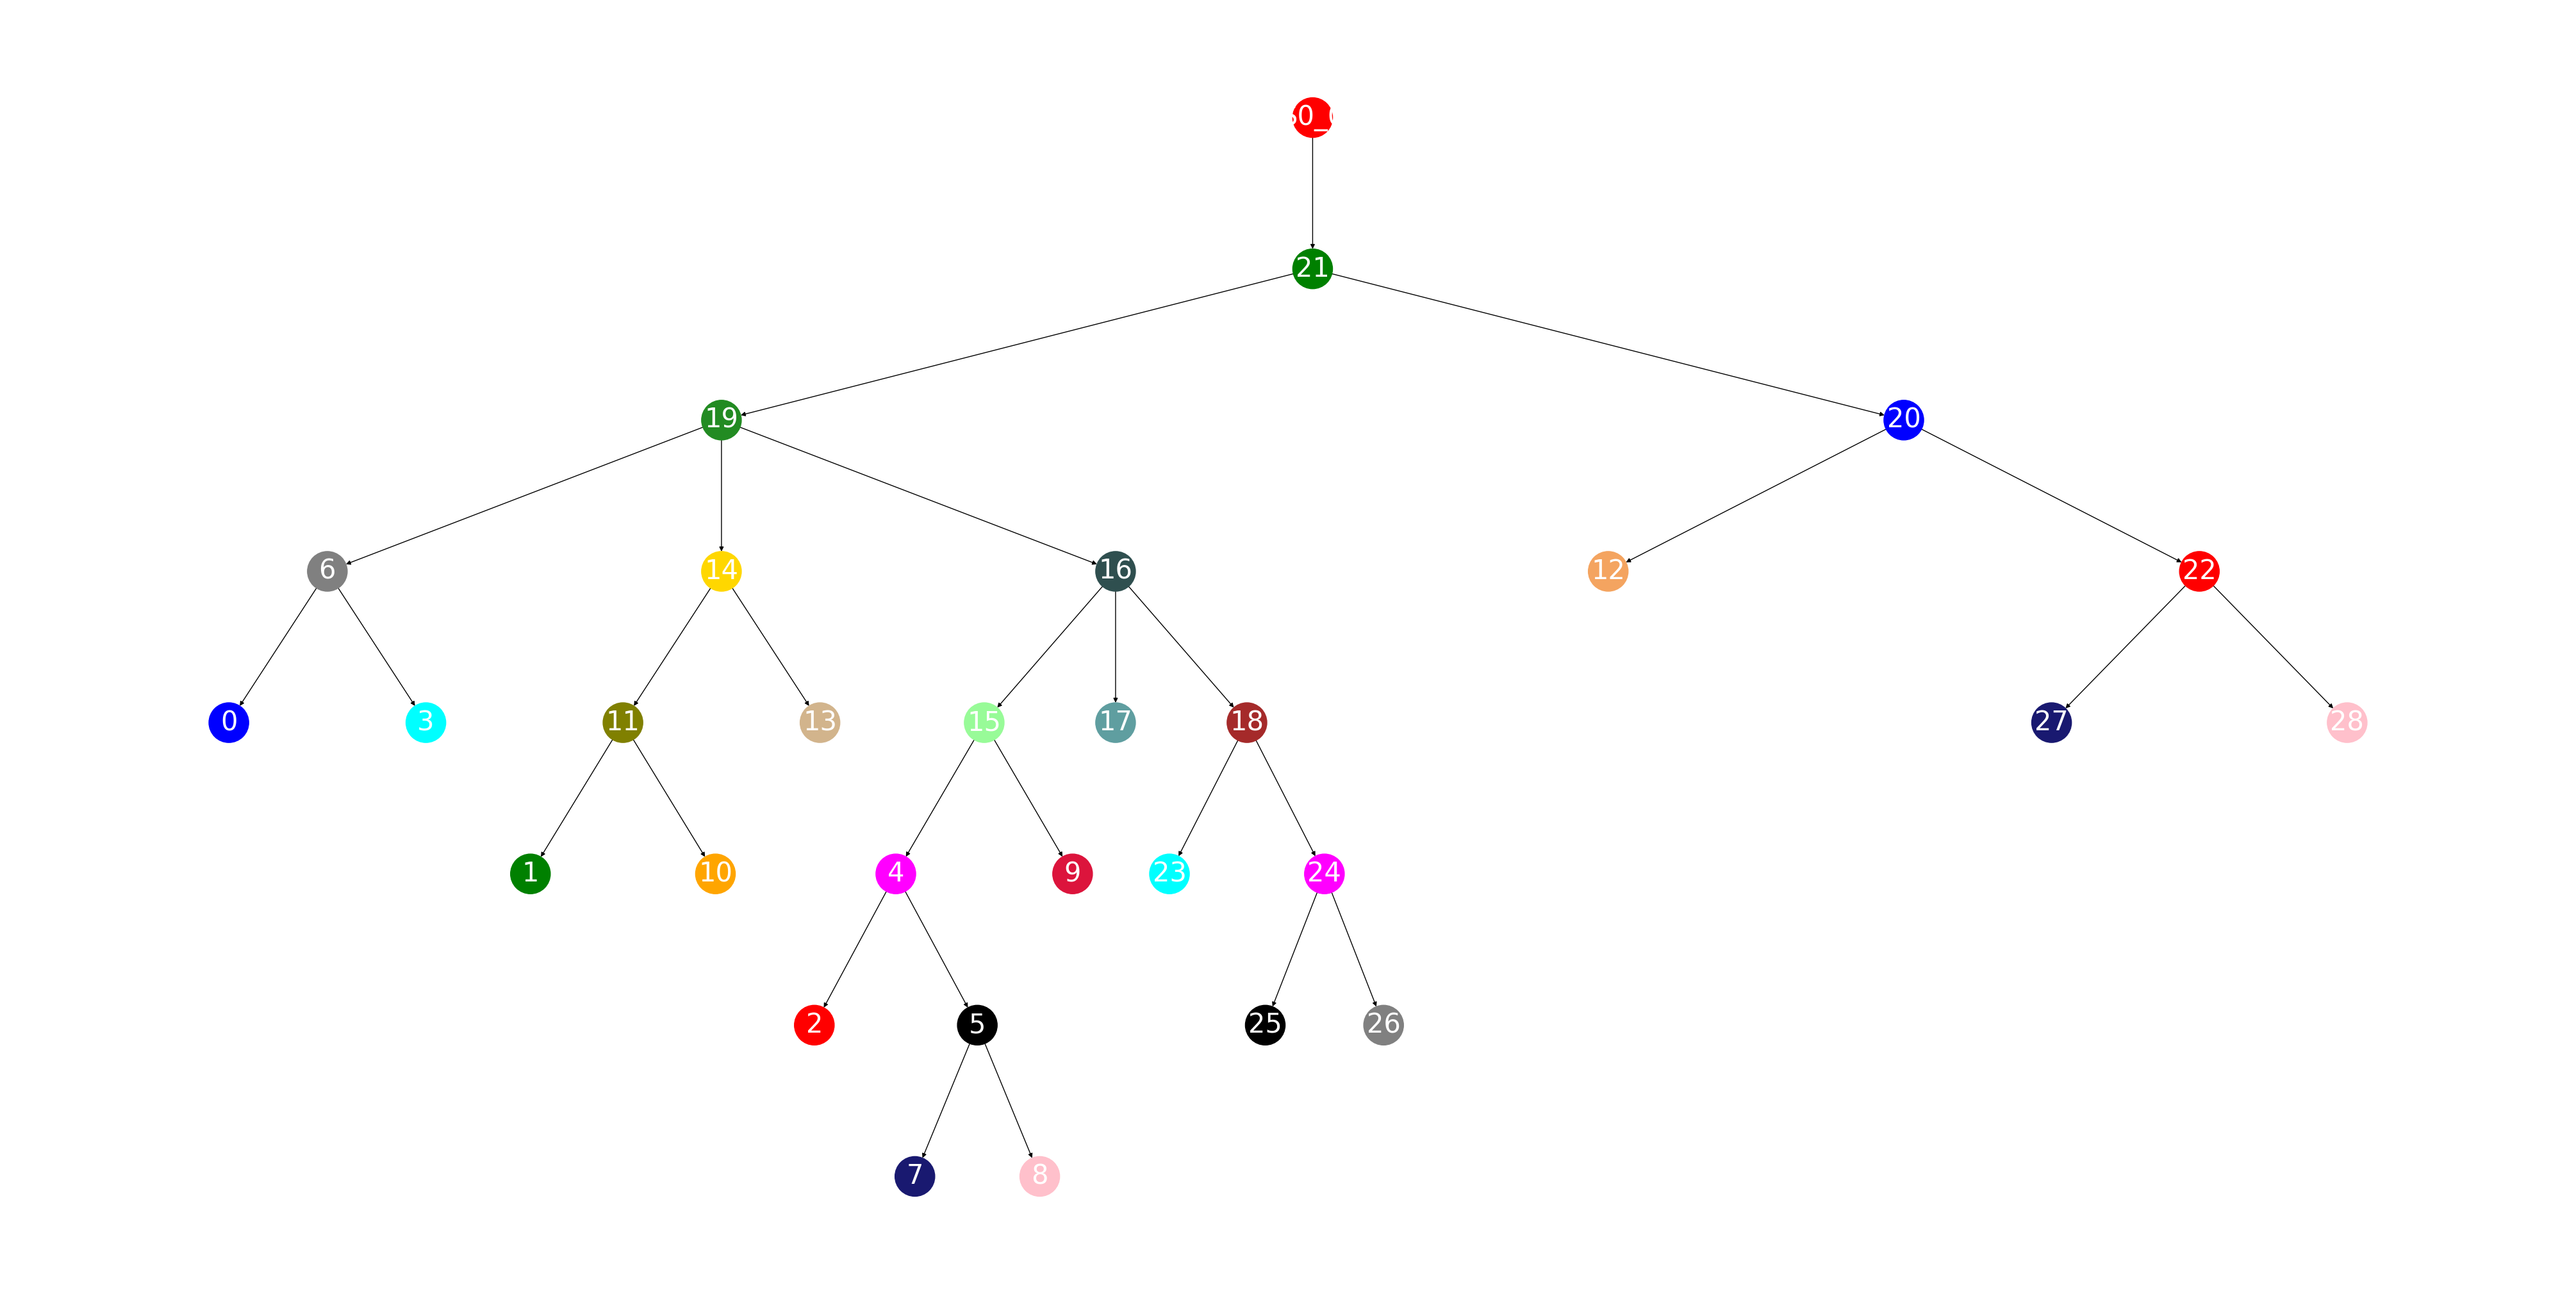

In [32]:
nviz.plot_limb(neuron_obj,0)

In [33]:
branch_idx = 3
limb_idx = 0

branch_mesh = neuron_obj[limb_idx][branch_idx].mesh
ipvu.plot_objects(branch_mesh)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [34]:
_ = branch_mesh.export(f"{segment_id}_limb_{limb_idx}_branch_{branch_idx}.off")

# Step 4A: Multi Soma Split Suggestions

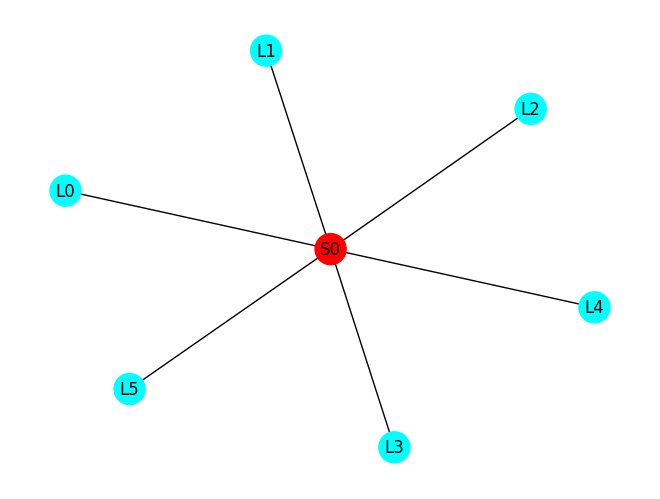

In [35]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [36]:
multi_soma_split_parameters = dict()

In [37]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


In [38]:
neuron_obj.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

In [70]:
print(neuron_obj.pipeline_products.multi_soma_split_suggestions)

    multi_soma_split_parameters:{}
    n_paths_cut:0
    red_blue_split_results:{}
    split_results:{}



# Step 4B: Multi Soma Split Execution

In [39]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [71]:
neuron_list

In [40]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 5: Cell Typing

In [41]:
from neurd import neuron_pipeline_utils as npu

In [42]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 3


Number of segments: 2


Number of segments: 5


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segme

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.83s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.209312677383423
branches_touching_root = [16]
combining close nodes
combine_threshold = 1300
length of Graph = 13106
After combining close endpoints max(kept_branches_idx) = 230, len(kept_branches_idx) = 190
empty_indices % = 0.0
 conflict_indices % = 0.05154251788018087
Decomposing first pass: 20.47698664665222
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.2159347534179688e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.01489710807800293
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552495.72569604  757785.38871569 1044811.89960749]
c

In [44]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [77]:
print(neuron_obj_axon.pipeline_products.cell_type_ax_dendr)

    axon_angle_max:149.2
    axon_angle_min:140.63
    axon_area:1032.656044129003
    axon_bbox_volume:1.4673807849061737
    axon_bbox_x_max:619219.1261623577
    axon_bbox_x_max_soma_relative:65688.9569723066
    axon_bbox_x_min:443412.9
    axon_bbox_x_min_soma_relative:-110117.26919005113
    axon_bbox_y_max:841750.1
    axon_bbox_y_max_soma_relative:91900.2846181537
    axon_bbox_y_min:757414.8
    axon_bbox_y_min_soma_relative:7564.984618153772
    axon_bbox_z_max:1090505.0
    axon_bbox_z_max_soma_relative:43049.99886935961
    axon_bbox_z_min:991536.0
    axon_bbox_z_min_soma_relative:-55919.00113064039
    axon_branch_length_mean:6.866150632489898
    axon_branch_length_median:3.981532299921612
    axon_length:1304.568620173082
    axon_n_branches:190
    axon_n_limbs:6
    axon_n_long_branches:0
    axon_n_medium_branches:67
    axon_n_short_branches:123
    axon_skeletal_length:1304568.620173082
    axon_skeleton:[[[ 443412.9         806315.9        1004607.        ]
  [ 44

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 0.8410499484014149
syn_density_head = 0.4126401309344441
syn_density_neck = 0.02102624871003537
syn_density_shaft = 0.3215263865242909
sk_length_synapse_density = 2282860.84988097
About to do spine_density stats
postsyn_limb_branch = {'L0': array([ 0,  1,  3,  4,  6,  9, 10, 11, 12, 13, 14, 15, 17, 18, 22, 23, 24,
       26]), 'L1': array([0, 1, 4, 7]), 'L2': array([ 6,  7, 14]), 'L4': array([0]), 'L5': array([0])}
sk_length = 2188966.271971849
# of spines = 987
Density = 0.4508977651404824
spine_density = 0.4508977651404824 (multiplier = 1000)
sk_length spine density = 2188966.271971849
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = excitatory, pred_class_label = excitatory
Total time for e/i calculations = 0.18821120262145996
baylor_e_i = excitatory

*****Using v7 Filters!!!


Current node skip 

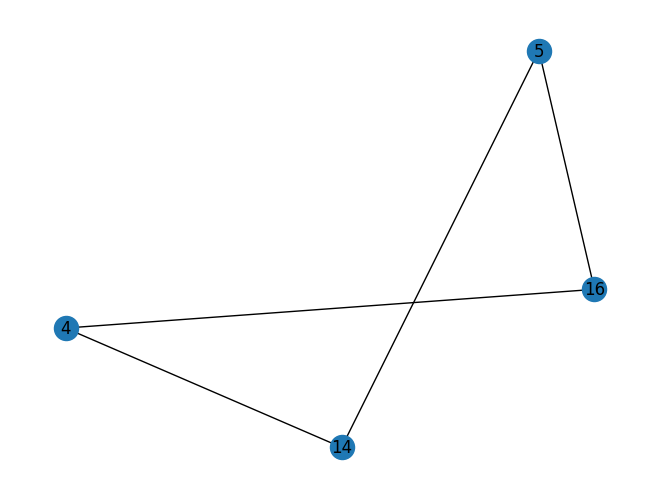

Performing global features query
Done with edge_df: 0.0012378692626953125
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   71.121876               0.414723              0.000335   
1   5  16     23.63    1.935042               0.011284              0.000335   
2  14   4     52.16    3.116131               0.030111              0.000000   
3  16   4     22.12   66.070703               0.638446              0.000000   

   n_synapses_diff  definite_partner_width_delete definite_partner_sk_delete  
0                1                           True                       None  
1                1                          False                       None  
2                0                          False                       None  
3                0                           True                       None  
Afer 

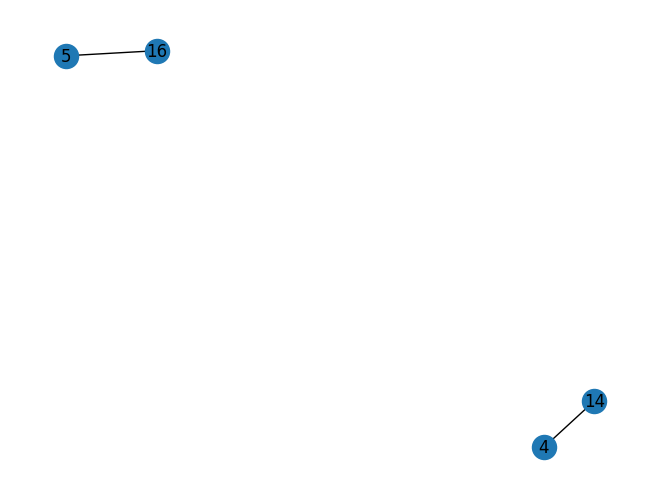

Performing node features query
Done with edge_df: 0.0008852481842041016
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    1.935042               0.011284              0.000335   
1  14   4     52.16    3.116131               0.030111              0.000000   

   n_synapses_diff  definite_partner_width_delete definite_partner_sk_delete  \
0                1                          False                       None   
1                0                          False                       None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    1.935042               0.011284              0.000335   
1  14   4     52.16    3.116131               0.030111          

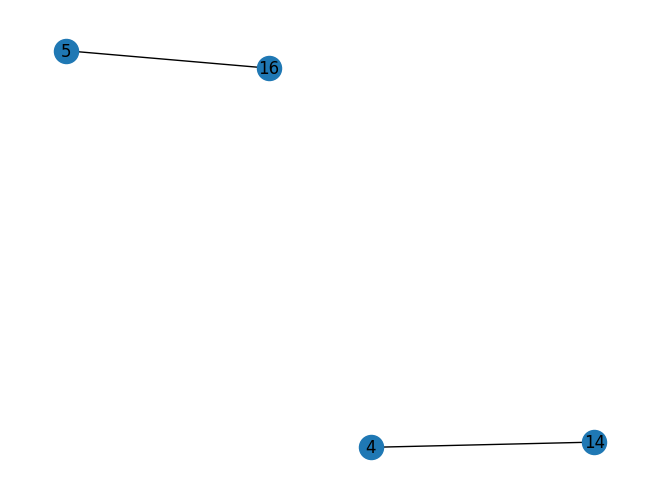

for upstream node 4, winning_node = 14, error_branches = [ 5 16]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (100.3705489424222) less than width_min(250)
Current node skip distance was 1881.2184387754712 but max skip distance was 2230.006899811245
Current node skip distance was 1513.8828772852676 but max skip distance was 1513.8828772852676
Current node skip distance was 2144.262148622706 but max skip distance was 2144.262148622706
Current node skip distance was 1545.9726948139066 but max skip distance was 1545.9726948139066
Current node skip distance was 1555.4698732187237 but max skip distance was 1555.4698732187237
Current node skip distance was 1730.5820713562362 but max skip distance was 1881.2184387754712
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0018415451049804688
Performing Edge Query
After edge filter, # of rows

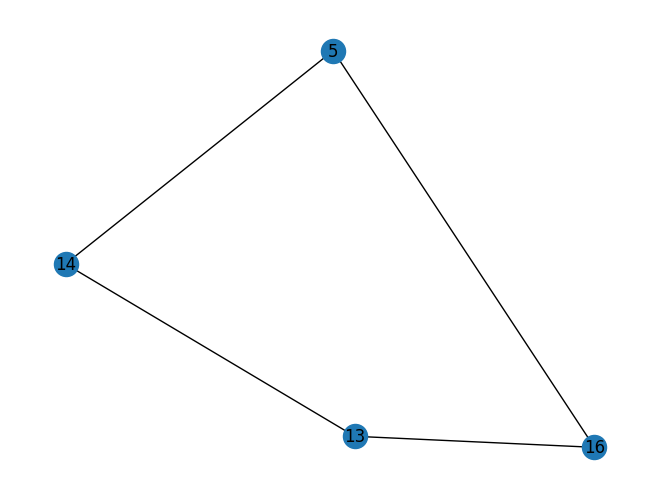

Performing global features query
Done with edge_df: 0.0012357234954833984
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   71.121876               0.414723              0.000335   
1   5  16     23.63    1.935042               0.011284              0.000335   
2  14  13     64.30   11.514943               0.102917              0.000000   
3  16  13     33.57   57.671891               0.515455              0.000000   

   n_synapses_diff  definite_partner_width_delete definite_partner_sk_delete  
0                1                           True                       None  
1                1                          False                       None  
2                0                          False                       None  
3                0                           True                       None  
Afer 

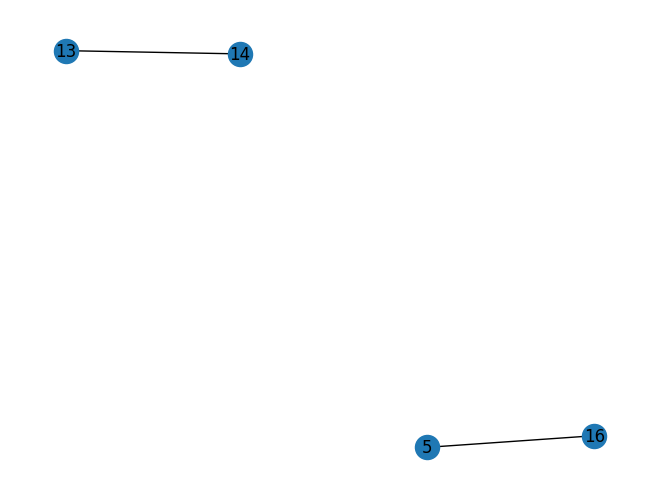

Performing node features query
Done with edge_df: 0.0008995532989501953
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    1.935042               0.011284              0.000335   
1  14  13     64.30   11.514943               0.102917              0.000000   

   n_synapses_diff  definite_partner_width_delete definite_partner_sk_delete  \
0                1                          False                       None   
1                0                          False                       None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    1.935042               0.011284              0.000335   
1  14  13     64.30   11.514943               0.102917          

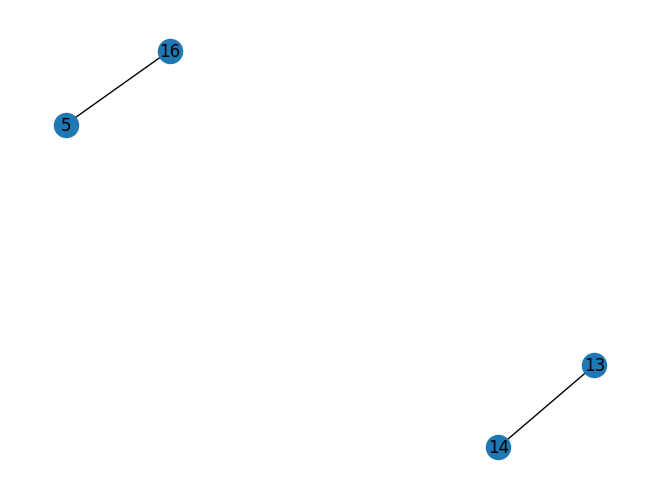

for upstream node 13, winning_node = 14, error_branches = [ 5 16]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (100.3705489424222) less than width_min(250)
Current node skip distance was 1584.8772872600919 but max skip distance was 1584.8772872600919
Current node skip distance was 1873.1557631602866 but max skip distance was 1873.1557631602866
Current node skip distance was 1714.8885119796291 but max skip distance was 2144.262148622706
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.002725362777709961
Performing Edge Query
After edge filter, # of rows = 7
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   0   2     83.24   80.583125               1.102563              0.000201   
1   0   4     63.12   38.798428               0.5

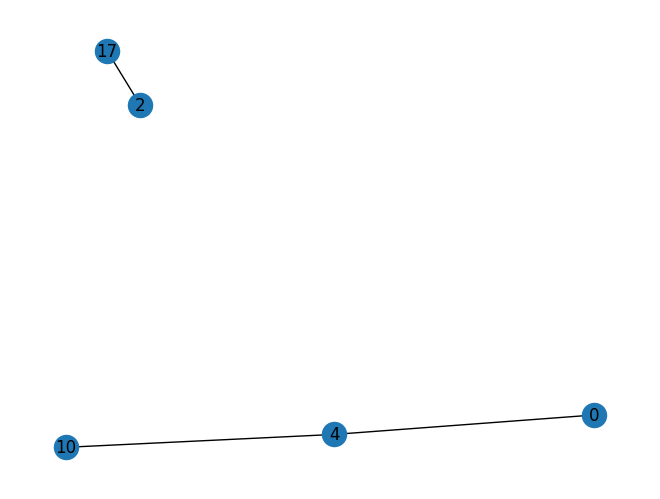

Performing global features query
Done with edge_df: 0.0008375644683837891
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   38.798428               0.530852              0.000000   
1  2  17      2.31   22.096946               0.167944              0.000201   
2  4  10     17.70   72.030046               0.643784              0.000000   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                        True                          None  
1                1                       False                          None  
2                0                       False                          None  
Afer Global query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  2  17      2.31   22.096946               0.167944              0.

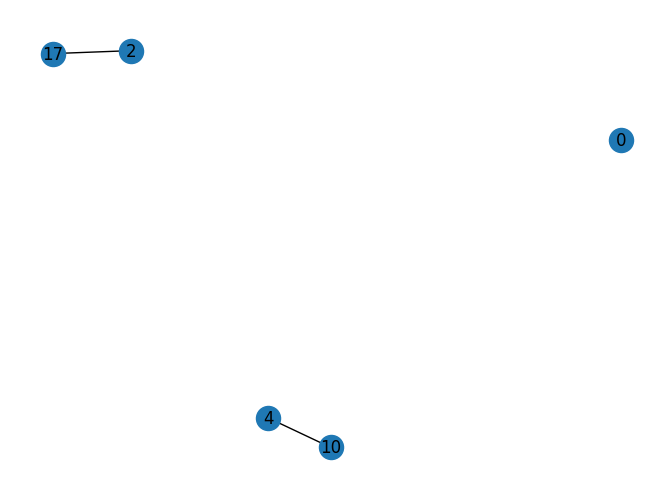

Performing node features query
Done with edge_df: 0.0008633136749267578
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  2  17      2.31   22.096946               0.167944              0.000201   
1  4  10     17.70   72.030046               0.643784              0.000000   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                1                       False                          None   
1                0                       False                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  2  17      2.31   22.096946               0.167944              0.000201   
1  4  10     17.70   72.030046               0.643784              0.

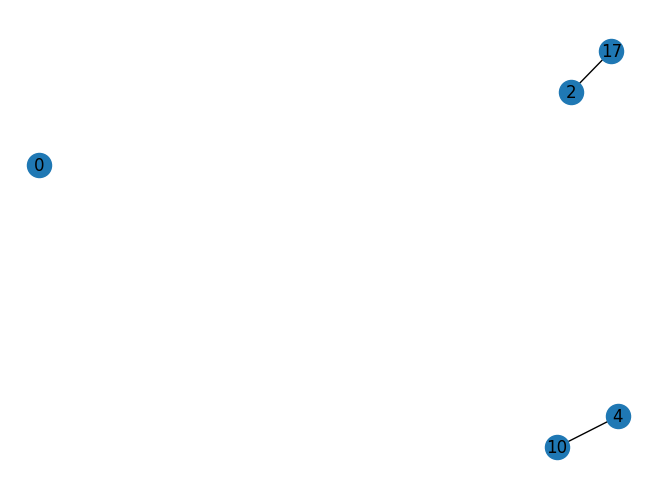

for upstream node 17, winning_node = 2, error_branches = [ 0  4 10]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1475.4158064926207 but max skip distance was 1475.4158064926207
Current node skip distance was 1780.438368687568 but max skip distance was 1780.438368687568
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0018825531005859375
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   58.072118               0.441367              0.000000   
1  17  21     70.64    1.703988               0.012951              0.000189   
2  17  19     56.33   15.731966               0.106798              0.000000 

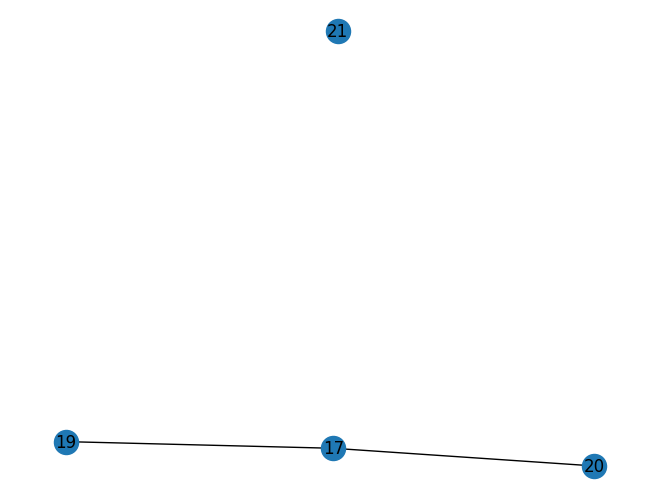

Performing global features query
Done with edge_df: 0.0007655620574951172
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   58.072118               0.441367                   0.0   
1  17  19     56.33   15.731966               0.106798                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False                           True  
1                0                        True                          False  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   58.072118               0.441367                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False             

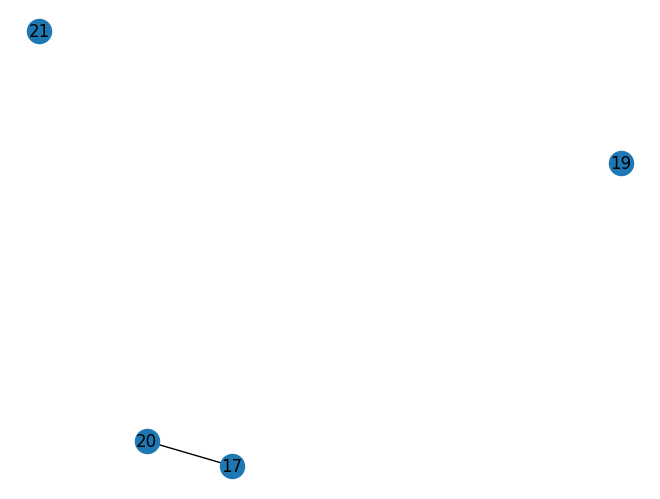

Performing node features query
Done with edge_df: 0.0007600784301757812
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   58.072118               0.441367                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                           True   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   58.072118               0.441367                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                           True   

  above_threshold_delete  
0                   None  


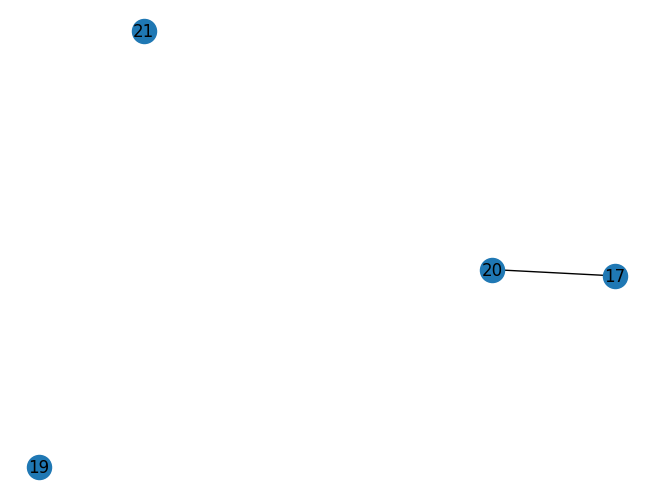

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1472.9213556462194 but max skip distance was 1472.9213556462194
Current node skip distance was 1707.788560665129 but max skip distance was 1794.8399341607883
Current node skip distance was 1628.36603139084 but max skip distance was 1628.36603139084
Current node skip distance was 1480.048301990361 but max skip distance was 1480.048301990361
Current node skip distance was 1505.8889992953318 but max skip distance was 1505.8889992953318
Current node skip distance was 1717.8365186111 but max skip distance was 1780.438368687568
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0024116039276123047
Performing Edge Query
After edge filter, # of rows = 9
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u   v  sk_angle  width_

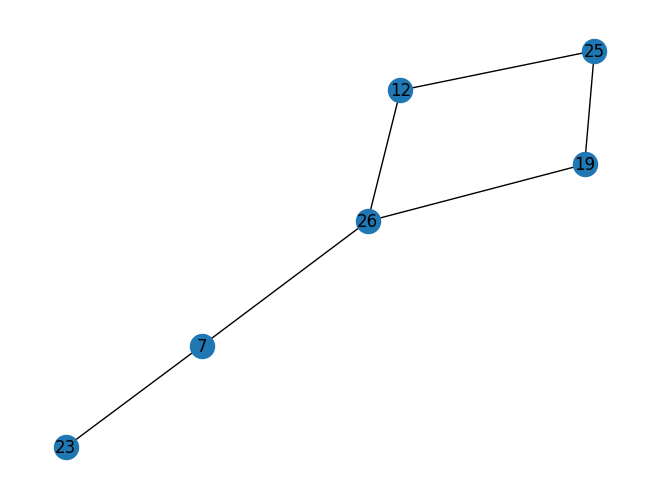

Performing global features query
Done with edge_df: 0.0009064674377441406
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1   7  26     45.19   13.405755               0.160872              0.000197   
2  12  26     29.39   23.386634               0.250626              0.000281   
3  12  25     43.29   38.967995               0.294585              0.000278   
4  19  26     59.91   77.379073               0.525298              0.000281   
5  19  25     32.65   15.024444               0.113580              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                      False                          None  
1                1                       True                          None  
2     

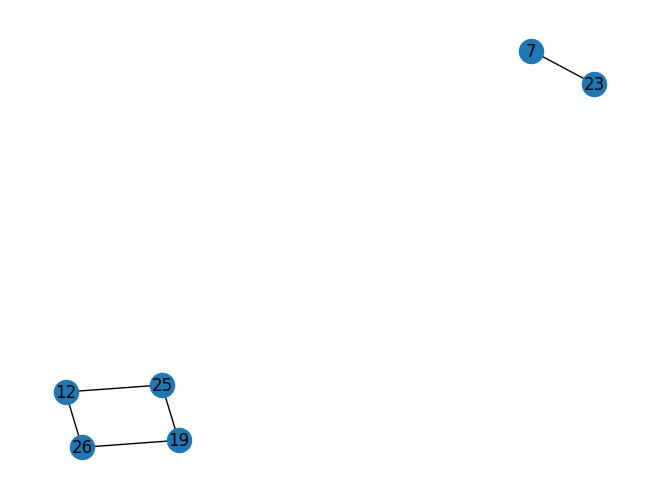

Performing node features query
Done with edge_df: 0.0009448528289794922
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1  12  26     29.39   23.386634               0.250626              0.000281   
2  12  25     43.29   38.967995               0.294585              0.000278   
3  19  26     59.91   77.379073               0.525298              0.000281   
4  19  25     32.65   15.024444               0.113580              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                      False                          None   
1                2                       None                          None   
2                1                       None                          None   
3       

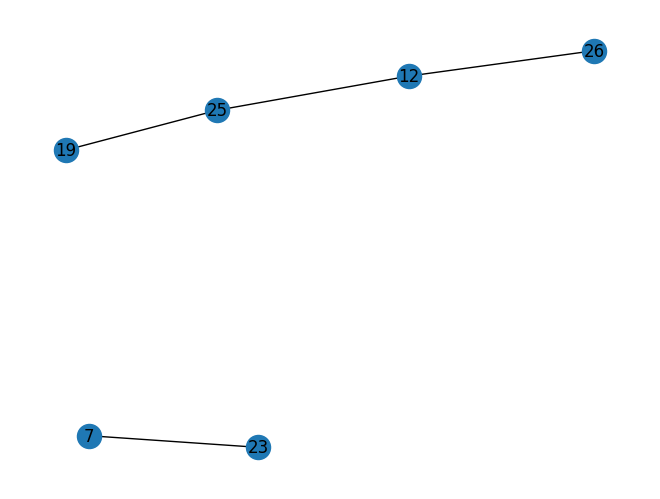

for upstream node 25, winning_node = None, error_branches = [ 7 12 19 23 26]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1458.0255655002047 but max skip distance was 1458.0255655002047
Current node skip distance was 1473.9583068018837 but max skip distance was 1473.9583068018837
Current node skip distance was 1439.2097328140164 but max skip distance was 1439.2097328140164
Current node skip distance was 1665.7633897842265 but max skip distance was 1717.8365186111
Current node skip distance was 1565.2484576535892 but max skip distance was 1565.2484576535892
Current node skip distance was 1373.696244750608 but max skip distance was 1373.696244750608
Current node skip distance was 2051.8343766422095 but max skip distance was 2051.8343766422095
Current node skip distance was 1404.8838081237225 but max skip distance was 1404.8838081237225
Current node skip distance was 1452.7036445270596 but max skip distance was 145

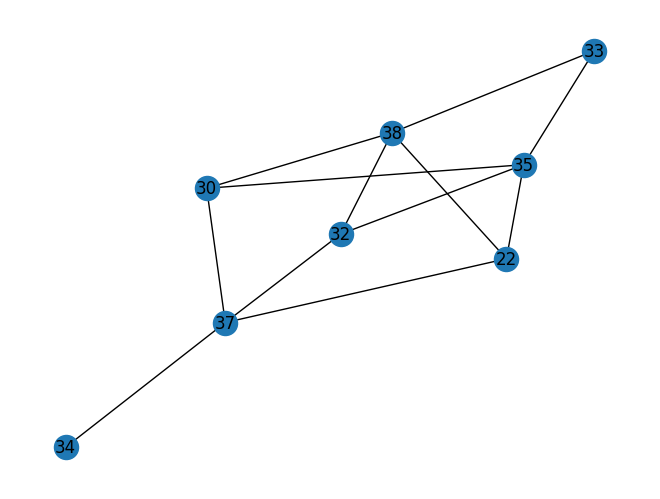

Performing global features query
Done with edge_df: 0.0016903877258300781
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   22  35     41.68   53.635734               0.484043              0.000000   
1   22  38     33.53   51.967919               0.468991              0.000000   
2   22  37     57.51   39.847775               0.264496              0.000197   
3   30  35     22.18   62.611100               0.522703              0.000000   
4   30  38     26.36   60.943285               0.508780              0.000000   
5   30  37     21.22   30.872409               0.204920              0.000197   
6   32  35     30.18   38.487516               0.402338              0.000000   
7   32  38     37.65   36.819701               0.384903              0.000000   
8   32  37     34.81   54.995993               0.365044              0.0

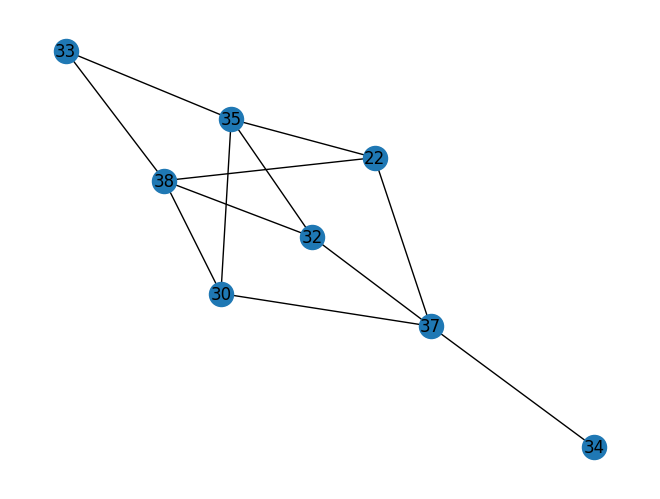

Performing node features query
Done with edge_df: 0.0012052059173583984
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   22  35     41.68   53.635734               0.484043              0.000000   
1   22  38     33.53   51.967919               0.468991              0.000000   
2   22  37     57.51   39.847775               0.264496              0.000197   
3   30  35     22.18   62.611100               0.522703              0.000000   
4   30  38     26.36   60.943285               0.508780              0.000000   
5   30  37     21.22   30.872409               0.204920              0.000197   
6   32  35     30.18   38.487516               0.402338              0.000000   
7   32  38     37.65   36.819701               0.384903              0.000000   
8   32  37     34.81   54.995993               0.365044              0.00019

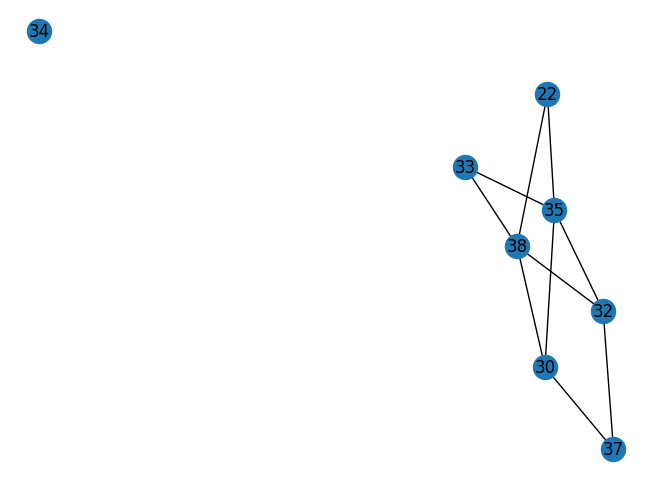

for upstream node 37, winning_node = None, error_branches = [22 30 32 33 34 35 38]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1411.8330370166711 but max skip distance was 1411.8330370166711
Current node skip distance was 1420.3496711923483 but max skip distance was 1420.3496711923483
Current node skip distance was 1567.6425816995368 but max skip distance was 1567.6425816995368
Current node skip distance was 1627.9792261350447 but max skip distance was 2300.0
Current node skip distance was 1763.4735386570042 but max skip distance was 1763.4735386570042
Current node skip distance was 1806.1698114568526 but max skip distance was 2194.6320494015
Current node skip distance was 1522.4348593997124 but max skip distance was 1522.4348593997124
Current node skip distance was 1413.411712631187 but max skip distance was 1413.411712631187
Current node skip distance was 1540.8304622134242 but max skip distance was 1763.4735

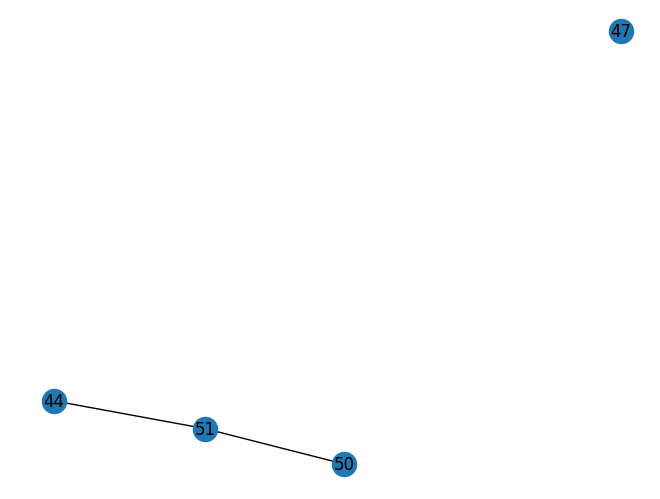

Performing global features query
Done with edge_df: 0.0007894039154052734
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                5                       None                          None  
1                2                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

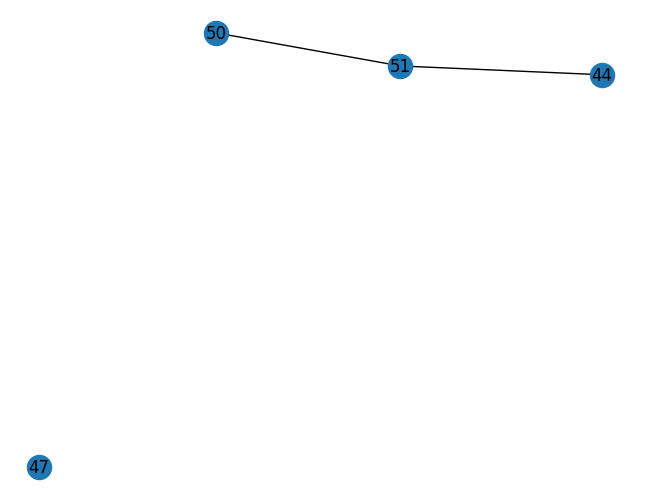

Performing node features query
Done with edge_df: 0.0011157989501953125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                5                       None                          None   
1                2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910             

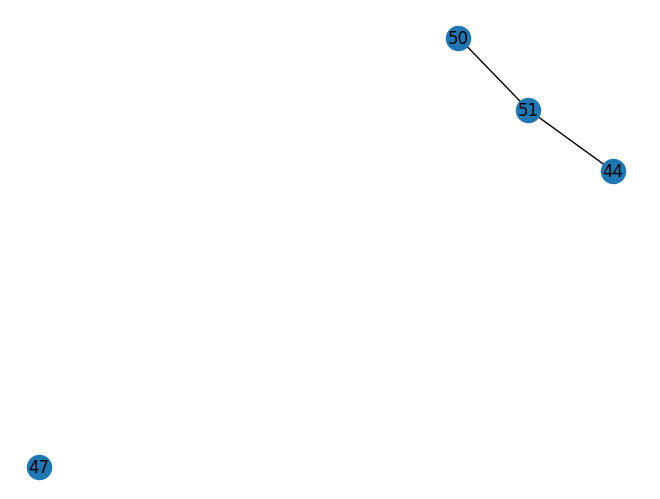

for upstream node 51, winning_node = None, error_branches = [44 47 50]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1386.728649079621 but max skip distance was 1386.728649079621
Current node skip distance was 1537.4462799508556 but max skip distance was 1537.4462799508556
Current node skip distance was 1817.7799948544416 but max skip distance was 2300.0
Current node skip distance was 1560.0432454088057 but max skip distance was 1769.2843244318244
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0027937889099121094
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   23.524690               0.264361               0

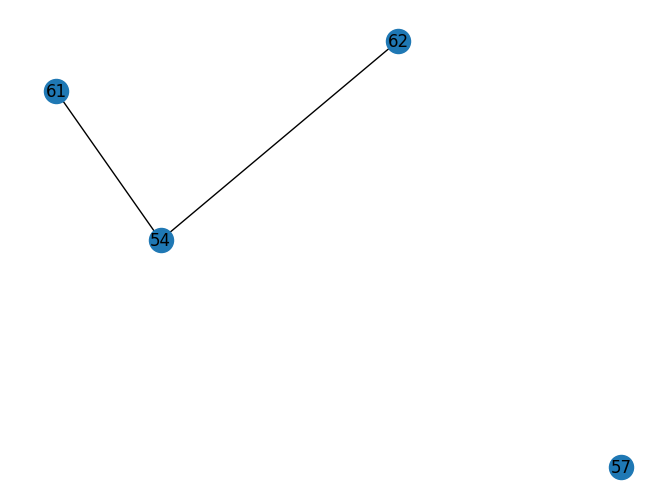

Performing global features query
Done with edge_df: 0.0007593631744384766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   23.524690               0.264361                   0.0   
1  54  62     30.17   55.641131               0.625272                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   23.524690               0.264361                   0.0   
1  54  62     30.17   55.641131               0.625272                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

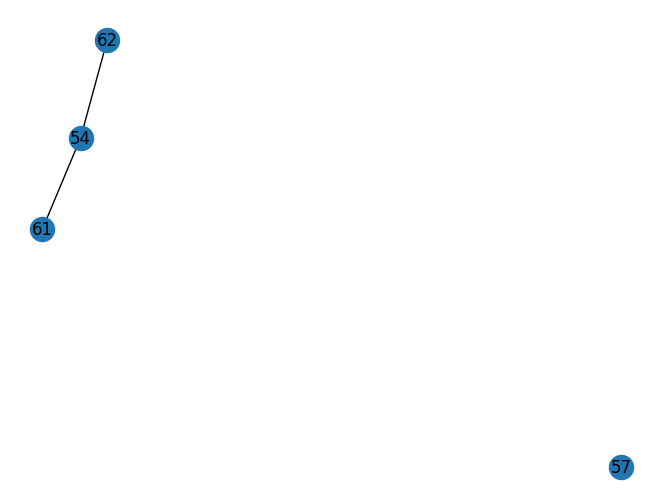

Performing node features query
Done with edge_df: 0.0007791519165039062
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   23.524690               0.264361                   0.0   
1  54  62     30.17   55.641131               0.625272                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   23.524690               0.264361                   0.0   
1  54  62     30.17   55.641131               0.625272             

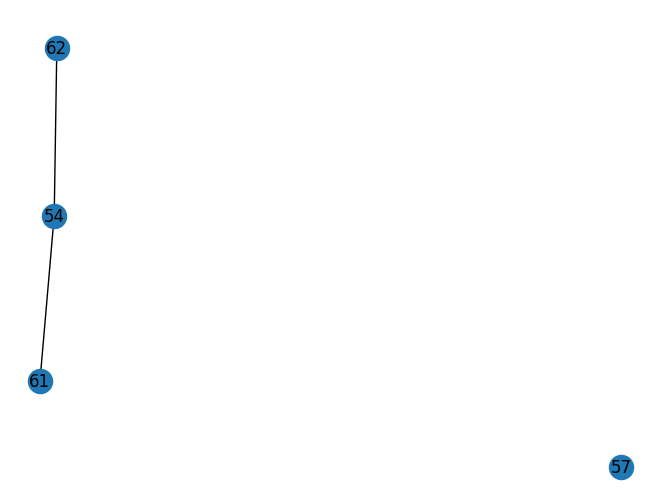

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1572.2757039727346 but max skip distance was 1806.1698114568526
Current node skip distance was 2022.4924179882116 but max skip distance was 2022.4924179882116
Current node skip distance was 1635.4658206212525 but max skip distance was 1635.4658206212525
Current node skip distance was 1769.2843244318244 but max skip distance was 1769.2843244318244
Current node skip distance was 2196.4442749140326 but max skip distance was 2300.0
Current node skip distance was 2070.8837175093295 but max skip distance was 2196.4442749140326
Current node skip distance was 1606.498192758714 but max skip distance was 1606.498192758714
Current node skip distance was 1752.2050797869952 but max skip distance was 2070.8837175093295
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done w

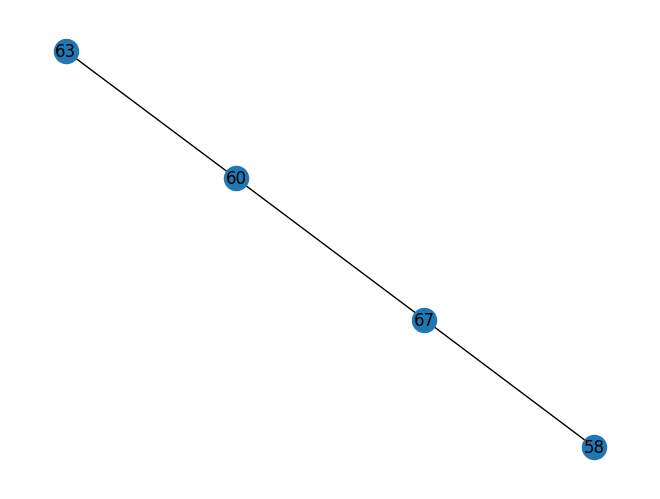

Performing global features query
Done with edge_df: 0.0023403167724609375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   43.183050               0.307289              0.000000   
1  60  63     43.14   31.484553               0.153285              0.000199   
2  60  67     28.74   64.868961               0.461605              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                3                       None                          None  
2                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   43.183050               0.307289              

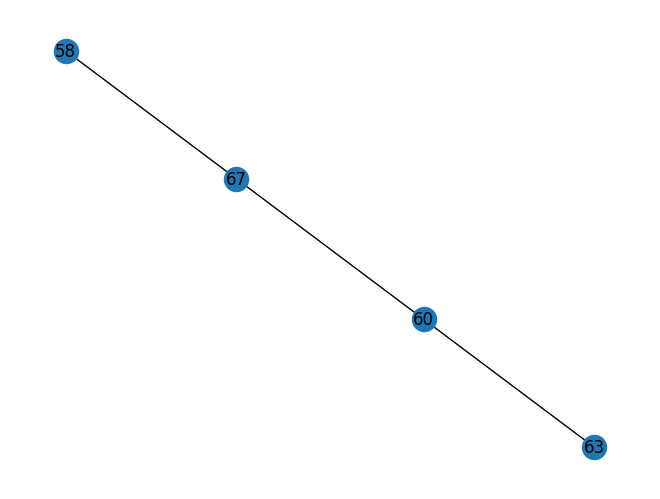

Performing node features query
Done with edge_df: 0.001068115234375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   43.183050               0.307289              0.000000   
1  60  63     43.14   31.484553               0.153285              0.000199   
2  60  67     28.74   64.868961               0.461605              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                3                       None                          None   
2                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_p

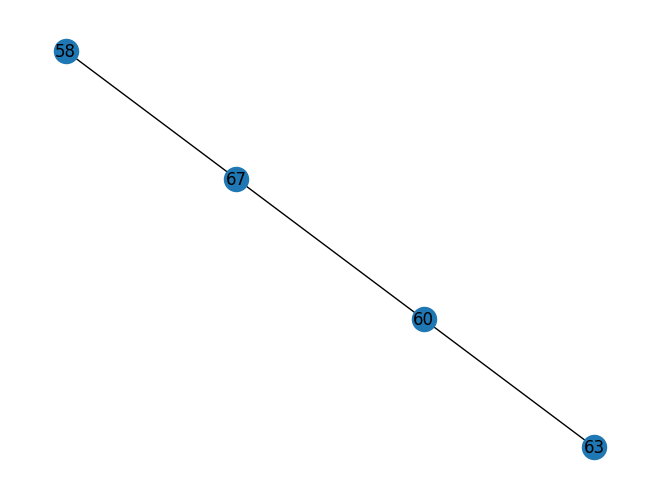

for upstream node 67, winning_node = None, error_branches = [58 60 63]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1953.9356343413888 but max skip distance was 1953.9356343413888
Current node skip distance was 1662.2622878608922 but max skip distance was 1953.9356343413888
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1450.8454232028087 but max skip distance was 1450.8454232028087
Current node skip distance was 1527.1977673222736 but max skip distance was 1527.1977673222736
Current node skip distance was 1777.2547339923053 but max skip distance was 1777.2547339923053
Current node skip distance was 1522.4508914465575 but max skip distance was 1733.8433656024922
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0023736953735351562
P

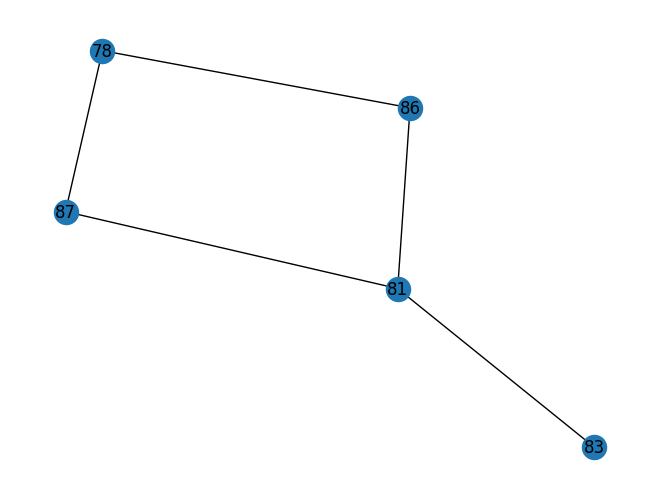

Performing global features query
Done with edge_df: 0.0013332366943359375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.312036               0.624171                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   11.469208               0.136847                   0.0   
3  86  78     51.57    1.776335               0.020803                   0.0   
4  87  78     33.58   13.047051               0.152797                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3       

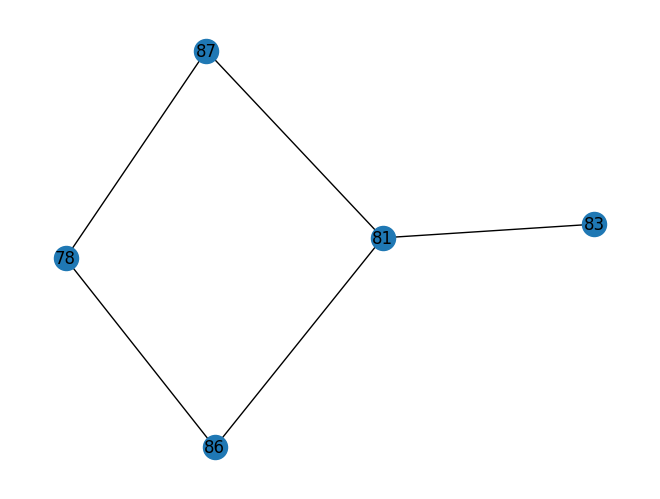

Performing node features query
Done with edge_df: 0.0008714199066162109
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.312036               0.624171                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   11.469208               0.136847                   0.0   
3  86  78     51.57    1.776335               0.020803                   0.0   
4  87  78     33.58   13.047051               0.152797                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3       

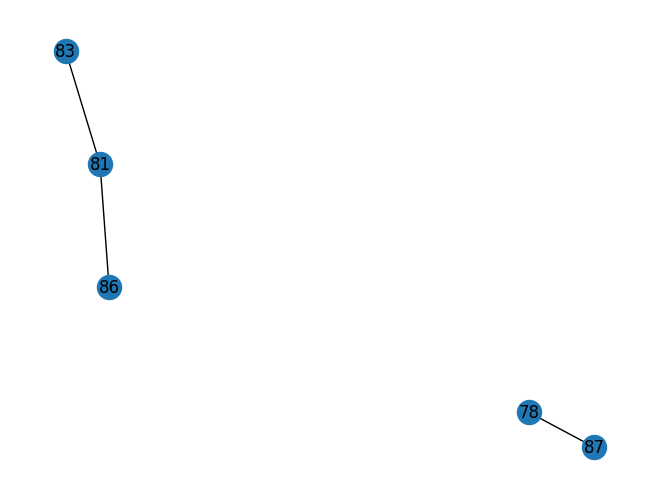

for upstream node 78, winning_node = 87, error_branches = [81 83 86]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1818.0837298540498 but max skip distance was 1818.0837298540498
Current node skip distance was 1496.9905664249613 but max skip distance was 1496.9905664249613
Current node skip distance was 1515.8765468973068 but max skip distance was 1515.8765468973068
Current node skip distance was 2105.622740144341 but max skip distance was 2105.622740144341
Current node skip distance was 1733.8433656024922 but max skip distance was 1733.8433656024922
Current node skip distance was 1338.0262176911103 but max skip distance was 2105.622740144341
Current node skip distance was 1529.8522860692512 but max skip distance was 1529.8522860692512
Current node skip distance was 1468.0881790702963 but max skip distance was 1696.8077209860685
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 

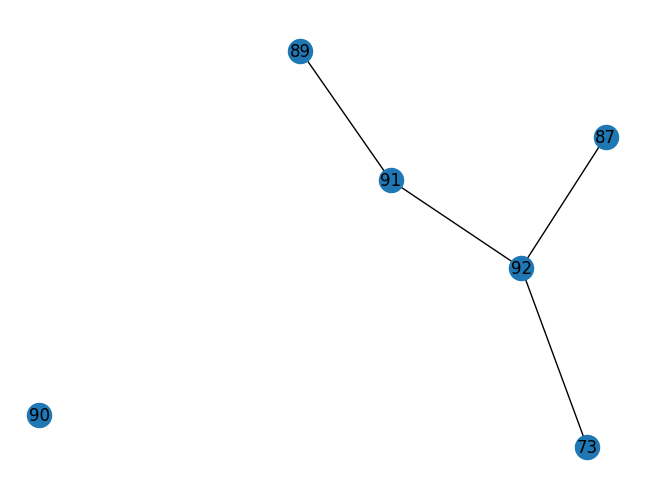

Performing global features query
Done with edge_df: 0.0008404254913330078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.038227               0.073871              0.000174   
1  89  91     64.64   37.990466               0.298588              0.000000   
2  91  92     49.21   16.002259               0.179310              0.000000   
3  92  87     12.25    0.899966               0.012441              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                2                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

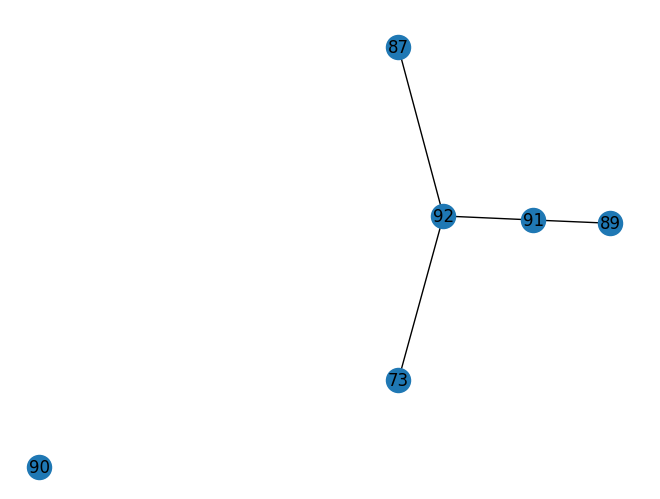

Performing node features query
Done with edge_df: 0.0008711814880371094
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.038227               0.073871              0.000174   
1  89  91     64.64   37.990466               0.298588              0.000000   
2  91  92     49.21   16.002259               0.179310              0.000000   
3  92  87     12.25    0.899966               0.012441              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

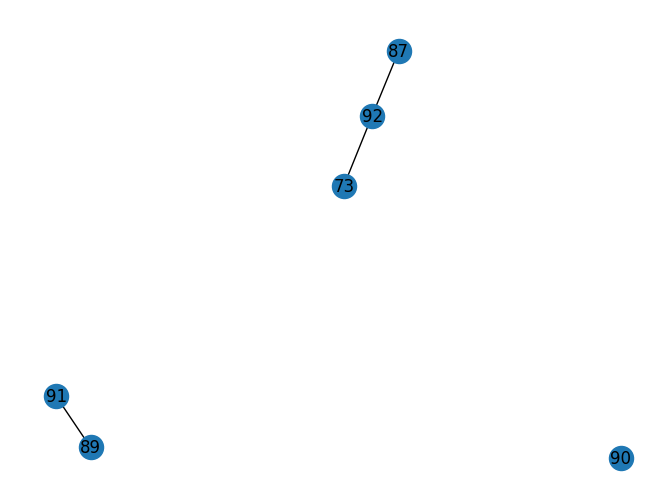

for upstream node 87, winning_node = None, error_branches = [73 89 90 91 92]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1558.6216205458607 but max skip distance was 1777.2547339923053
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0017938613891601562
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  77    112.54   27.598187               0.232029              0.000000   
1  69  82     40.65   73.688438               0.619528              0.000248   
2  69  88     77.03   24.873760               0.264420              0.000112   
3  77  82    101.75   46.090251               0.314521              0.000248   
4  77  88     5

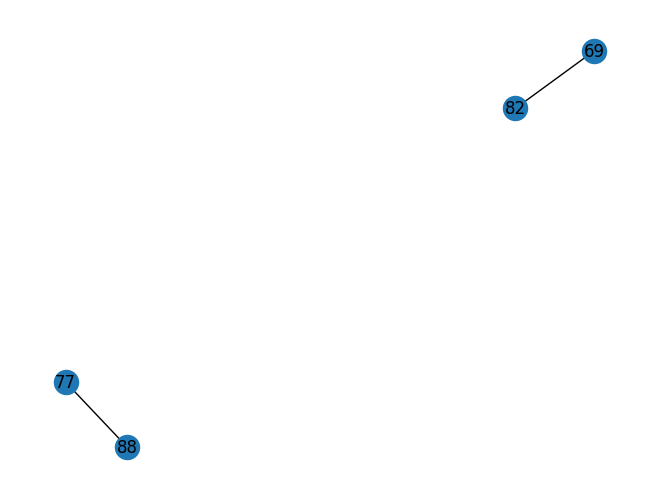

Performing global features query
Done with edge_df: 0.0007696151733398438
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   73.688438               0.619528              0.000248   
1  77  88     58.28   52.471947               0.557802              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                      False                          None  
1                7                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   73.688438               0.619528              0.000248   
1  77  88     58.28   52.471947               0.557802              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

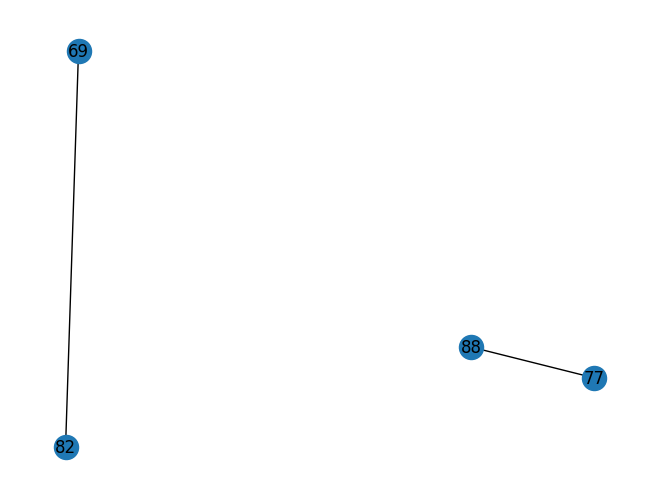

Performing node features query
Done with edge_df: 0.000762939453125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   73.688438               0.619528              0.000248   
1  77  88     58.28   52.471947               0.557802              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                      False                          None   
1                7                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   73.688438               0.619528              0.000248   
1  77  88     58.28   52.471947               0.557802              0.0

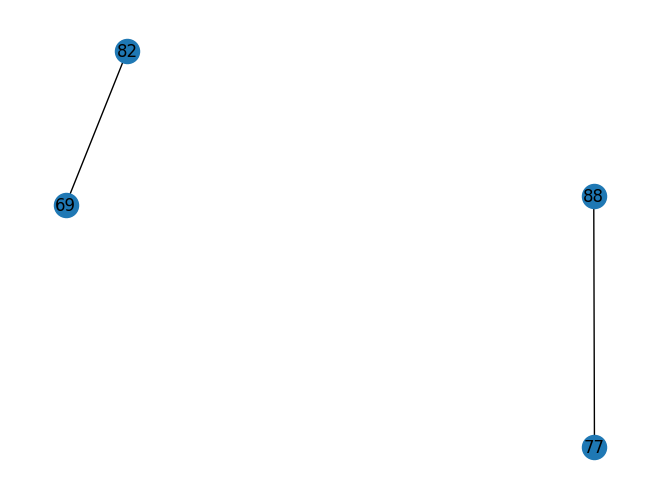

for upstream node 88, winning_node = 77, error_branches = [69 82]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (146.54113615815348) less than width_min(250)
Current node skip distance was 1696.8077209860685 but max skip distance was 1696.8077209860685
Current node skip distance was 1606.4223594525445 but max skip distance was 1606.4223594525445
Current node skip distance was 1538.5141142847306 but max skip distance was 1538.5141142847306
Current node skip distance was 1471.8380360714896 but max skip distance was 1471.8380360714896
Current node skip distance was 1529.1076968233356 but max skip distance was 1695.8650917761452
Current node skip distance was 2279.136986353731 but max skip distance was 2279.136986353731
Current node skip distance was 1505.828917486155 but max skip distance was 2279.136986353731
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff <

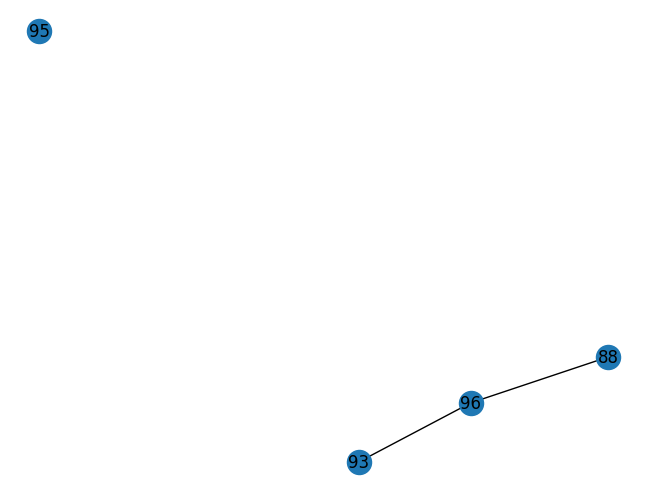

Performing global features query
Done with edge_df: 0.001058340072631836
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   
1  93  96     50.91    5.586907               0.068636              0.000020   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                          None  
1                1                        True                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                  

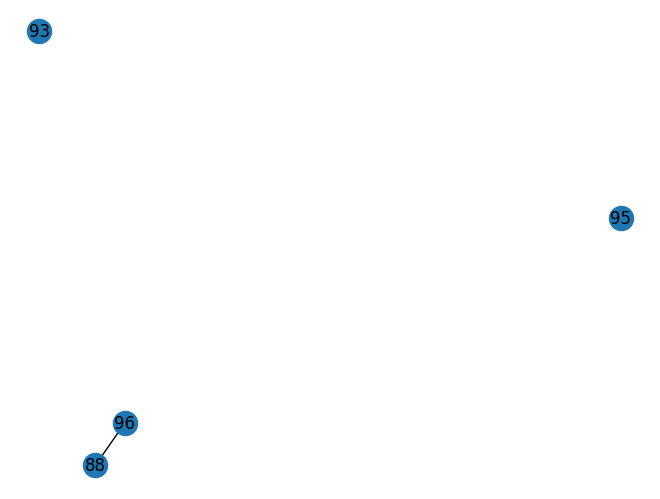

Performing node features query
Done with edge_df: 0.0007526874542236328
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  


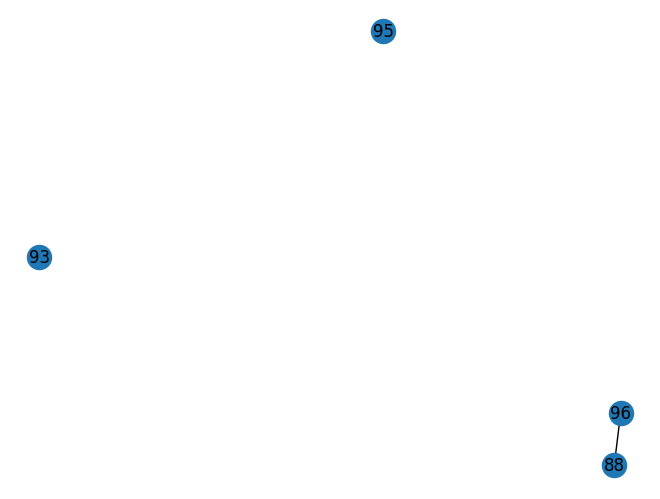

for upstream node 96, winning_node = 88, error_branches = [93 95]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (97.55504075401218) less than width_min(250)
Current node skip distance was 1672.751065705178 but max skip distance was 1987.0475794936974
Current node skip distance was 1529.5449883497408 but max skip distance was 1529.5449883497408
Current node skip distance was 1714.031247526074 but max skip distance was 1714.031247526074
Current node skip distance was 1987.0475794936974 but max skip distance was 1987.0475794936974
Current node skip distance was 1583.6275862891944 but max skip distance was 1793.1204510958955
Current node skip distance was 1474.7194784132298 but max skip distance was 1511.821861851435
Current node skip distance was 1517.7243823465901 but max skip distance was 1517.7243823465901
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1548.078618260593 but max skip distance was 1548.078618

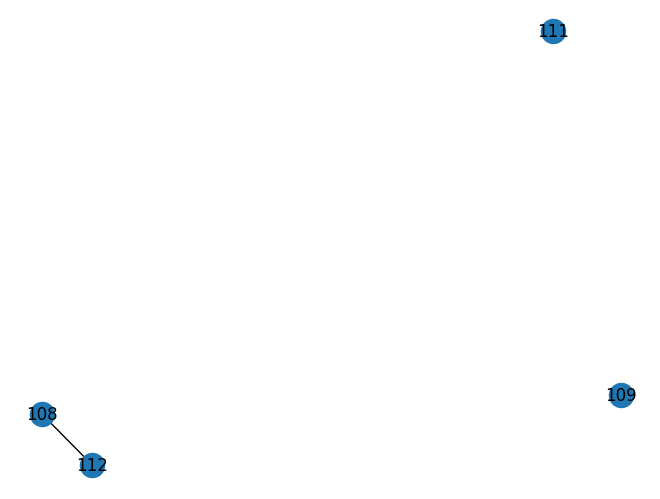

Performing global features query
Done with edge_df: 0.0007724761962890625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  


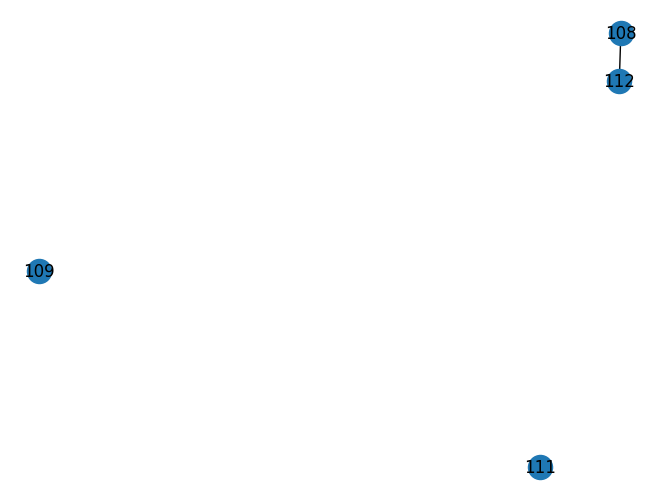

Performing node features query
Done with edge_df: 0.0007839202880859375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


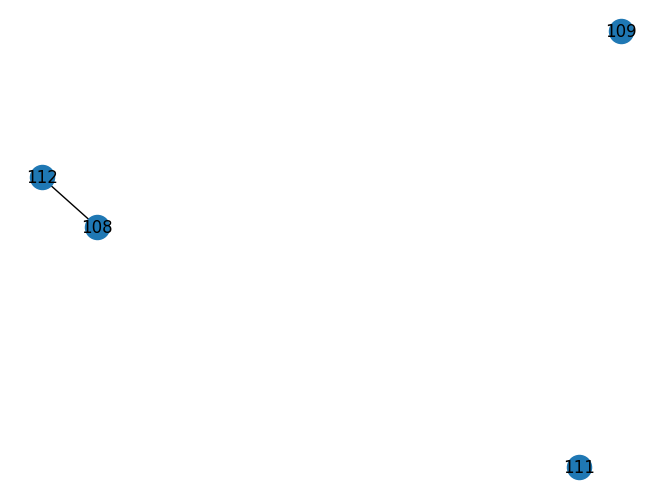

for upstream node 108, winning_node = 112, error_branches = [109 111]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (59.81510376025246) less than width_min(250)
Current node skip distance was 1558.5661985162365 but max skip distance was 1558.5661985162365
Current node skip distance was 1797.2595723232098 but max skip distance was 1797.2595723232098
Current node skip distance was 1463.7042418842564 but max skip distance was 1463.7042418842564
Current node skip distance was 1415.8962656677181 but max skip distance was 1415.8962656677181
Current node skip distance was 1519.0395242468926 but max skip distance was 1519.0395242468926
Current node skip distance was 1728.1378169550399 but max skip distance was 1728.1378169550399
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009813308715820312
Performing Edge Query
After edge filter, #

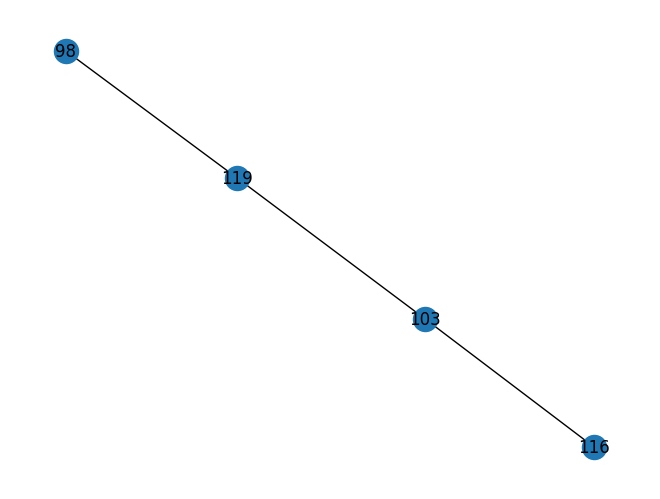

Performing global features query
Done with edge_df: 0.0007843971252441406
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   
1  103  119     40.55   23.511190               0.234946   
2  103  116     41.01   34.682455               0.257378   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   

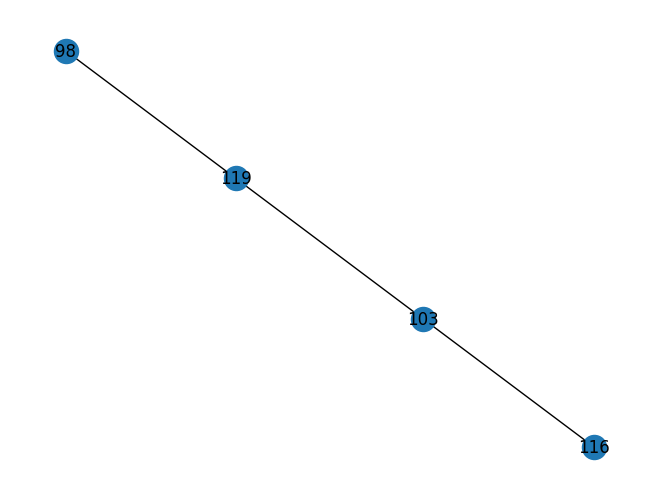

Performing node features query
Done with edge_df: 0.0008080005645751953
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   
1  103  119     40.55   23.511190               0.234946   
2  103  116     41.01   34.682455               0.257378   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

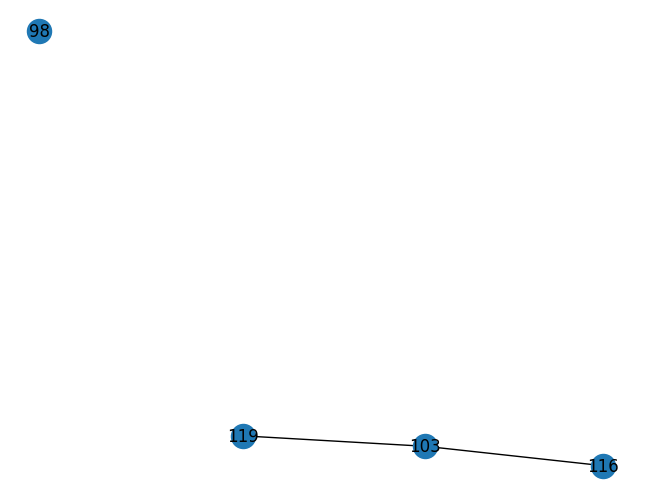

for upstream node 116, winning_node = None, error_branches = [ 98 103 119]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1673.5203859322692 but max skip distance was 2191.120721696408
Current node skip distance was 1671.9687490571375 but max skip distance was 2120.59571727634
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009670257568359375
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  120     94.45   45.655389               0.447519   
1  108  122     75.40   39.451274               0.386706   
2  108  118     56.28   19.253730               0.158764   
3  120  122    159.93    6.204114               0.110073   
4  120  118    140.15   6

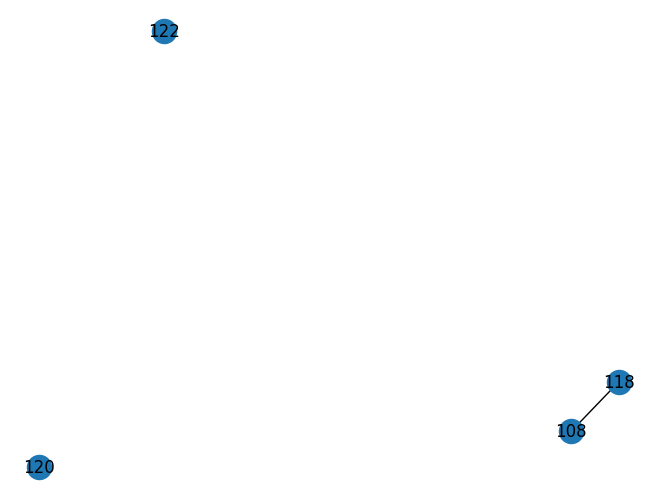

Performing global features query
Done with edge_df: 0.002632617950439453
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    19.25373               0.158764   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    19.25373               0.158764   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete  
0                          None  


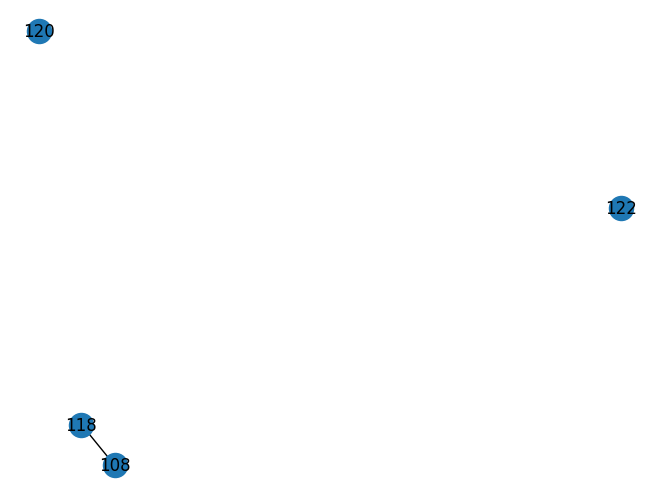

Performing node features query
Done with edge_df: 0.0011763572692871094
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    19.25373               0.158764   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    19.25373               0.158764   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


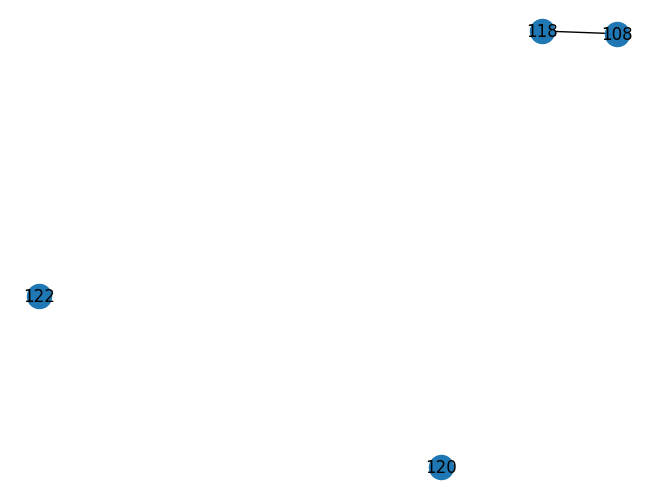

for upstream node 118, winning_node = 108, error_branches = [120 122]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (105.74704339911008) less than width_min(250)
Current node skip distance was 1485.6642933551425 but max skip distance was 1558.868122651933
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0033860206604003906
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   17.357294               0.184400   
1  149  152     73.40   15.037336               0.159754   
2  149  119     96.83   17.568919               0.229481   
3  151  152    115.64    2.319957               0.030219   
4  151  119     68.71    0.211625               0.002764   
5  152  119     12.83    2.531583

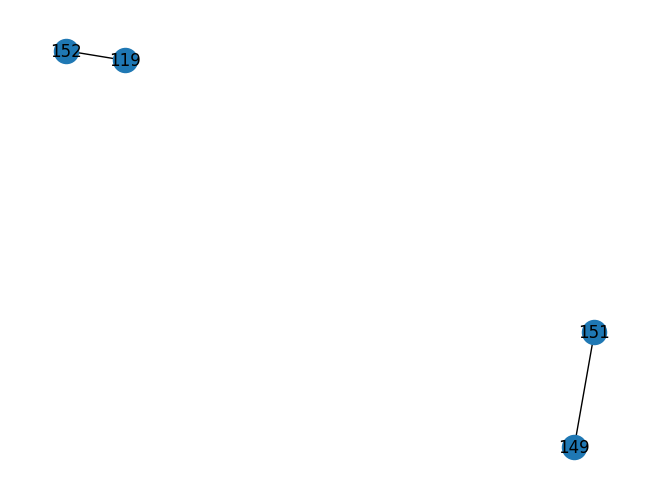

Performing global features query
Done with edge_df: 0.002166271209716797
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   17.357294               0.184400   
1  152  119     12.83    2.531583               0.033067   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete  
0                          None  
1                         False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   17.357294               0.184400   
1  152  119     12.83    2.531583               0.033067   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000      

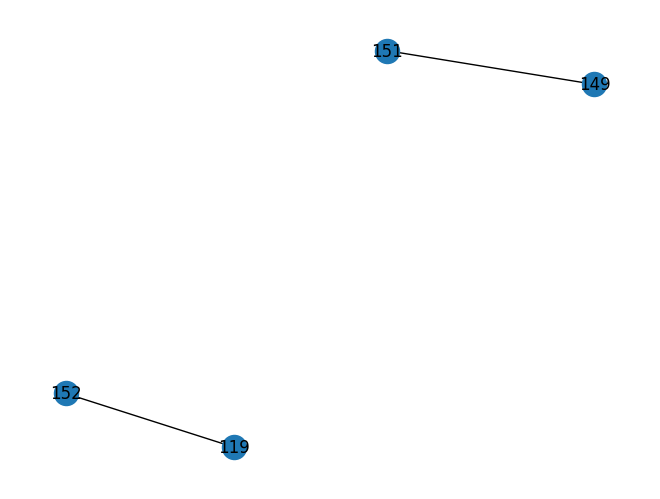

Performing node features query
Done with edge_df: 0.0011076927185058594
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   17.357294               0.184400   
1  152  119     12.83    2.531583               0.033067   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                         False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   17.357294               0.184400   
1  152  119     12.83    2.531583               0.033067   

   synapse_density_diff  n_synapses_d

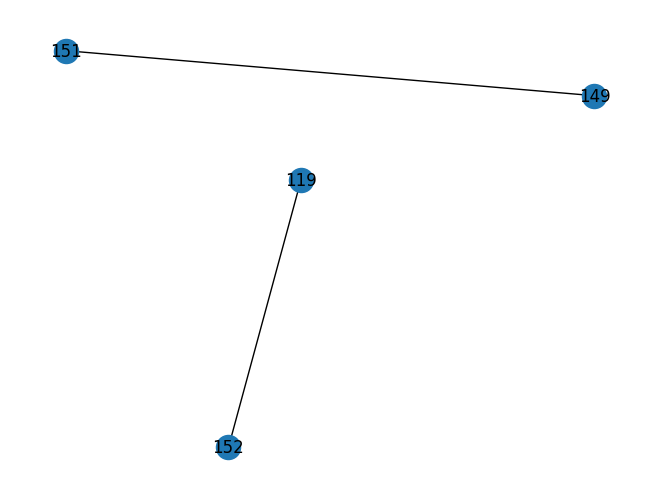

for upstream node 119, winning_node = 152, error_branches = [149 151]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (86.65776251469174) less than width_min(250)
Current node skip distance was 1401.514089053542 but max skip distance was 1673.5203859322692
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0020902156829833984
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.427056               0.203754   
1  117  135     26.31   23.068273               0.241943   
2  117  120    129.50   38.982440               0.691627   
3  134  135    107.21    3.641218               0.047962   
4  134  120     66.14   19.555384               0.346952   
5  135  120     38.50   15.914166 

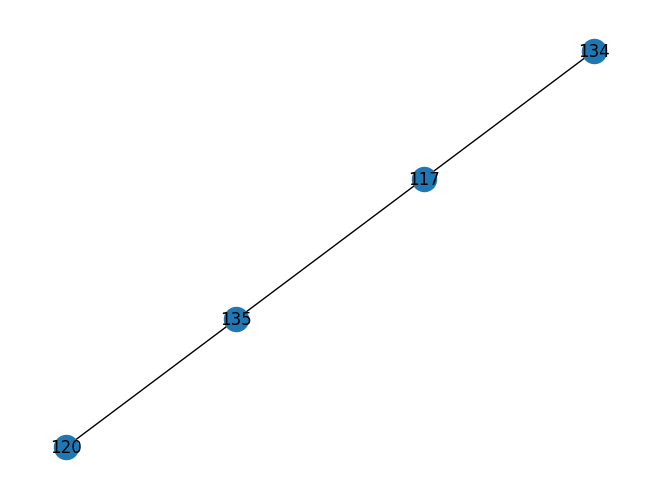

Performing global features query
Done with edge_df: 0.0007767677307128906
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.427056               0.203754   
1  117  135     26.31   23.068273               0.241943   
2  135  120     38.50   15.914166               0.282349   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.427056               0.203754   

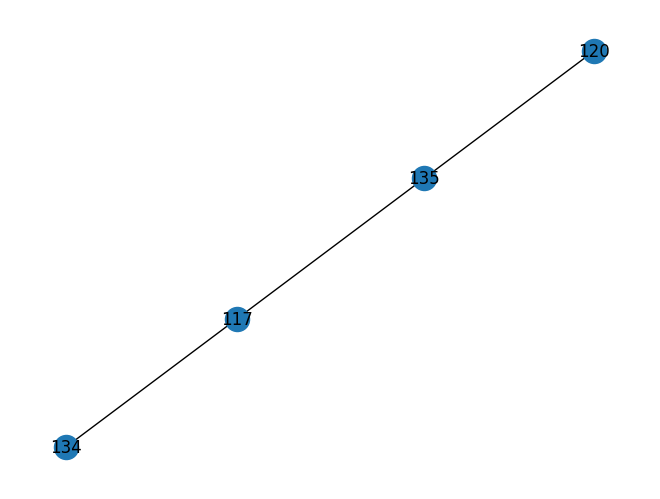

Performing node features query
Done with edge_df: 0.0008437633514404297
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.427056               0.203754   
1  117  135     26.31   23.068273               0.241943   
2  135  120     38.50   15.914166               0.282349   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

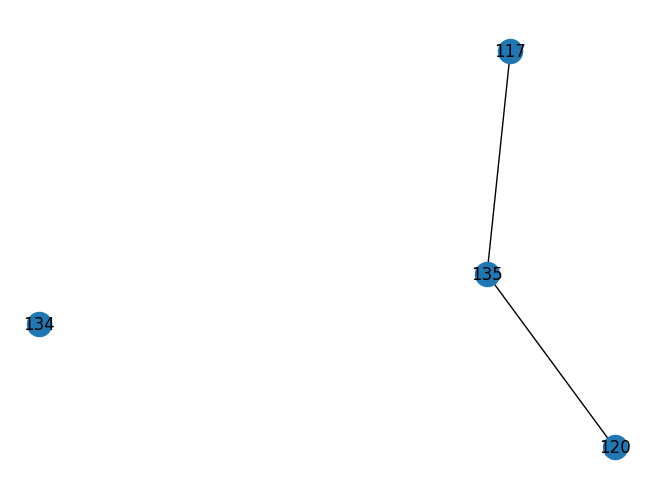

for upstream node 120, winning_node = None, error_branches = [117 134 135]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2222.4913642393867 but max skip distance was 2222.4913642393867
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.001956462860107422
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  123     76.31    5.079141               0.033561   
1  110  124     29.09   89.874543               0.593849   
2  110  121     82.29  142.004160               0.484083   
3  123  124     83.10   84.795401               0.579745   
4  123  121     26.58  147.083301               0.501398   
5  124  121    122.22  231.878702               0.790460  

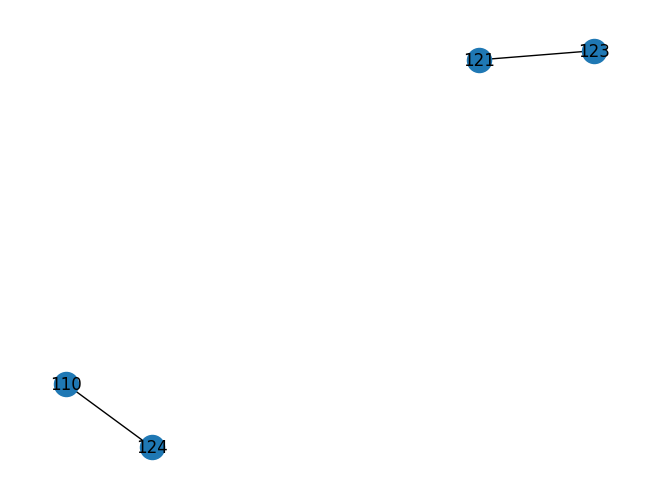

Performing global features query
Done with edge_df: 0.0007512569427490234
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   89.874543               0.593849   
1  123  121     26.58  147.083301               0.501398   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   89.874543               0.593849   
1  123  121     26.58  147.083301               0.501398   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107     

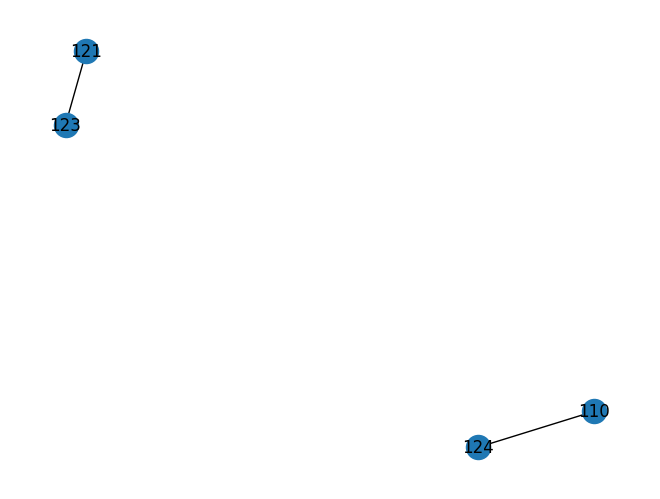

Performing node features query
Done with edge_df: 0.0010683536529541016
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   89.874543               0.593849   
1  123  121     26.58  147.083301               0.501398   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   89.874543               0.593849   
1  123  121     26.58  147.083301               0.501398   

   synapse_density_diff  n_synapses_d

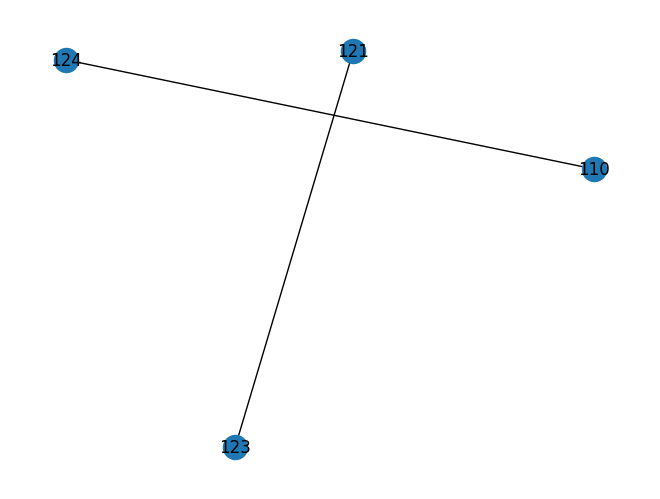

for upstream node 121, winning_node = 123, error_branches = [110 124]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (146.26315613109648) less than width_min(250)
Current node skip distance was 1427.364565567501 but max skip distance was 1427.364565567501
Current node skip distance was 1776.096483879568 but max skip distance was 2093.5699978548564
Current node skip distance was 1422.7823118140598 but max skip distance was 1422.7823118140598
Current node skip distance was 1458.0752703648905 but max skip distance was 1458.0752703648905
Current node skip distance was 2093.5699978548564 but max skip distance was 2093.5699978548564
Current node skip distance was 1556.065657251308 but max skip distance was 1556.065657251308
Current node skip distance was 1550.1241718840056 but max skip distance was 2142.1063878645527
Current node skip distance was 1449.235144763992 but max skip distance was 1449.235144763992
Current node skip distance was 1906.2663347269172 but max 

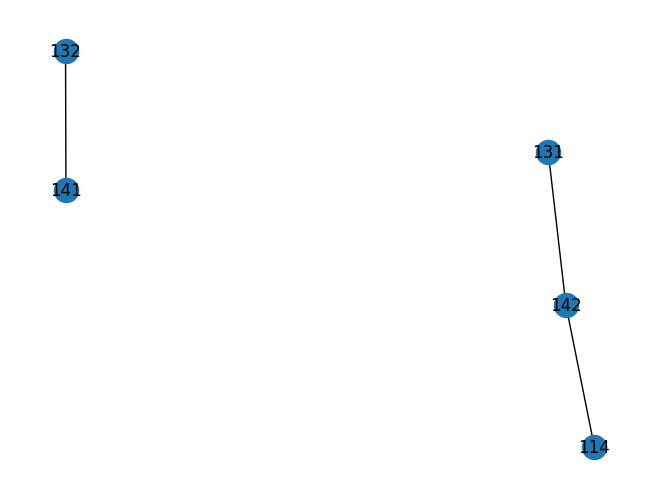

Performing global features query
Done with edge_df: 0.001161813735961914
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   
1  131  142     14.97   14.582371               0.215027   
2  141  132      6.99   82.430546               0.464387   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   


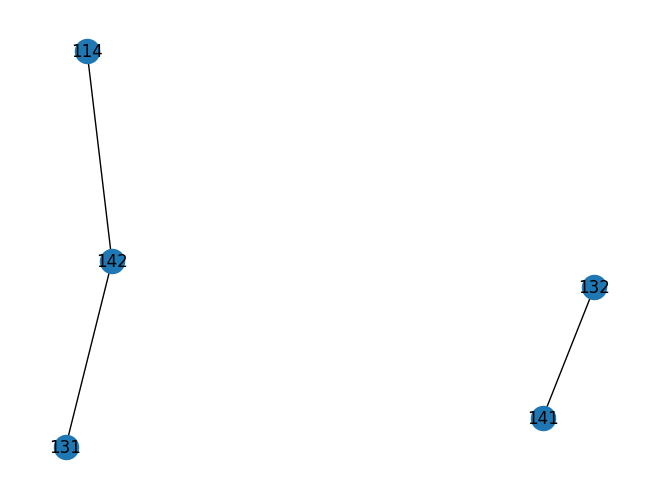

Performing node features query
Done with edge_df: 0.0008516311645507812
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   
1  131  142     14.97   14.582371               0.215027   
2  141  132      6.99   82.430546               0.464387   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

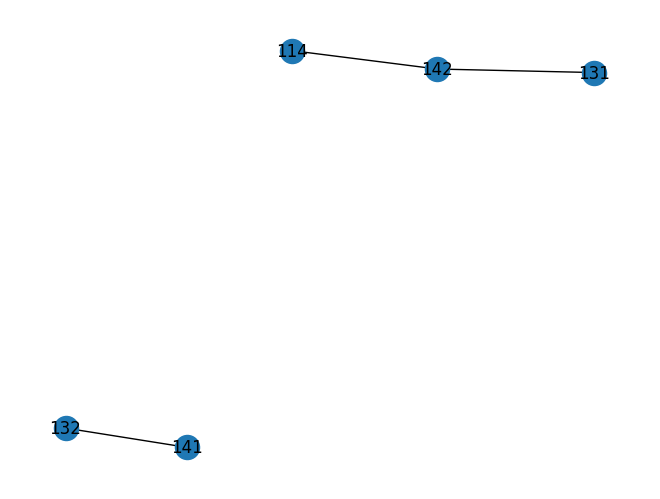

for upstream node 132, winning_node = 141, error_branches = [114 131 142]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1844.3747246878115 but max skip distance was 1906.2663347269172
Current node skip distance was 1482.9948556594454 but max skip distance was 1482.9948556594454
Current node skip distance was 1467.8231152466783 but max skip distance was 1467.8231152466783
Current node skip distance was 1981.7388412643036 but max skip distance was 1981.7388412643036
Current node skip distance was 1438.6446821350578 but max skip distance was 1438.6446821350578
Current node skip distance was 2300 but max skip distance was 2300.0
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0018134117126464844
Performing Edge Query
After edge filter, # of rows = 7
Exporting the edges
Dele

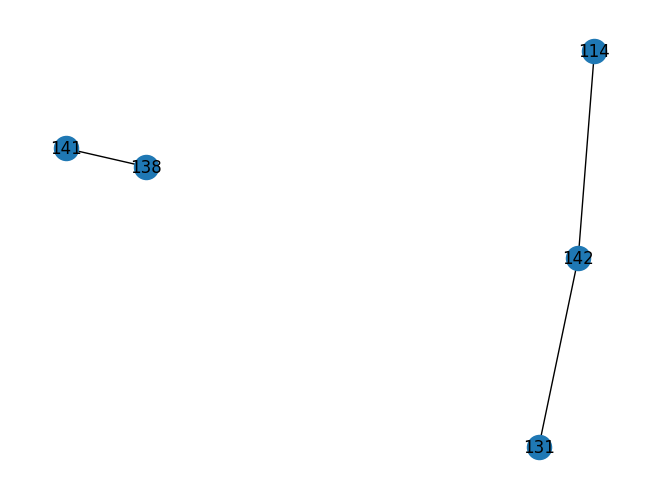

Performing global features query
Done with edge_df: 0.0010142326354980469
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   
1  131  142     14.97   14.582371               0.215027   
2  141  138      8.36  122.810622               0.563651   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   

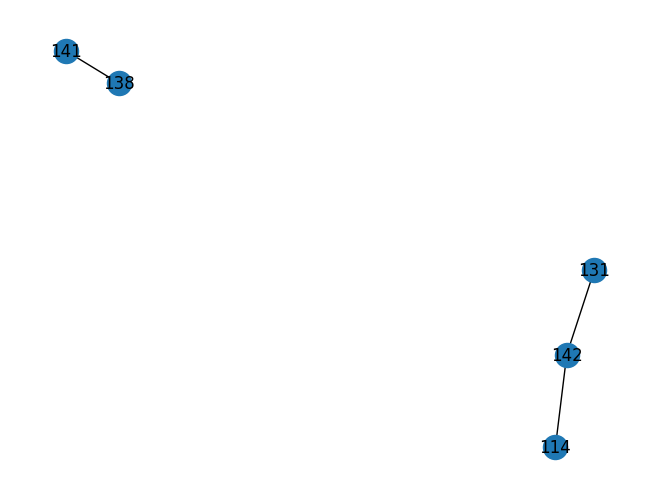

Performing node features query
Done with edge_df: 0.0008289813995361328
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   
1  131  142     14.97   14.582371               0.215027   
2  141  138      8.36  122.810622               0.563651   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

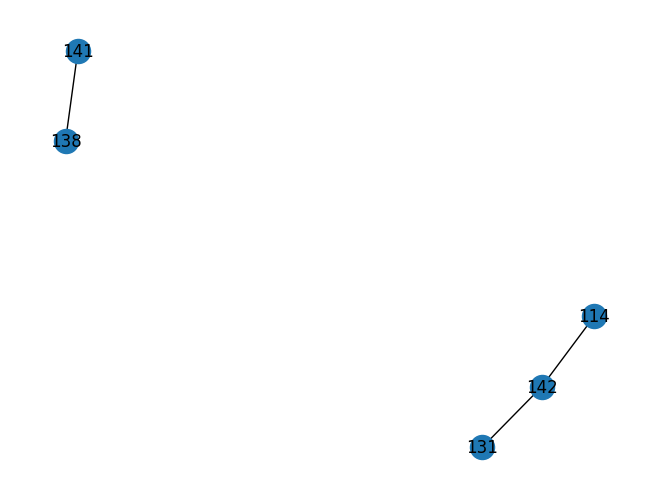

for upstream node 138, winning_node = 141, error_branches = [114 131 142]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1562.8057260398737 but max skip distance was 1562.8057260398737
Current node skip distance was 1388.4752639608032 but max skip distance was 1388.4752639608032
Current node skip distance was 1827.073428913216 but max skip distance was 1844.3747246878115
Current node skip distance was 1511.821861851435 but max skip distance was 1511.821861851435
Current node skip distance was 1829.4403823438415 but max skip distance was 1829.4403823438415
Current node skip distance was 1421.724095731764 but max skip distance was 1587.281058495119
Current node skip distance was 1558.868122651933 but max skip distance was 1558.868122651933
Current node skip distance was 1538.175416053853 but max skip distance was 1538.175416053853
Current node skip distance was 1486.5460657443796 but max skip distance 

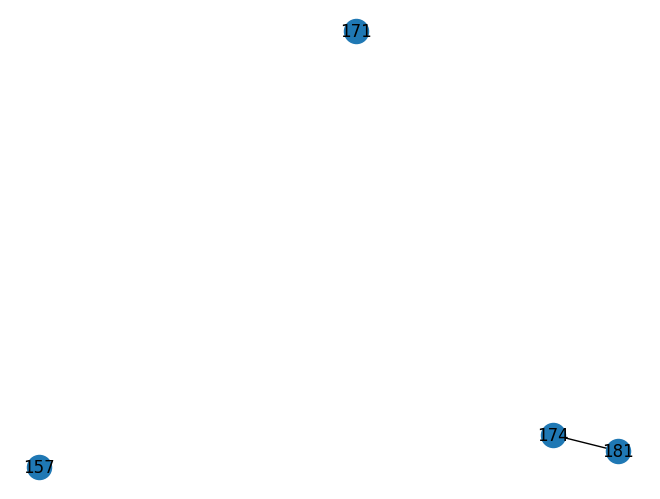

Performing global features query
Done with edge_df: 0.0008358955383300781
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    5.220111               0.025049   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    5.220111               0.025049   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  


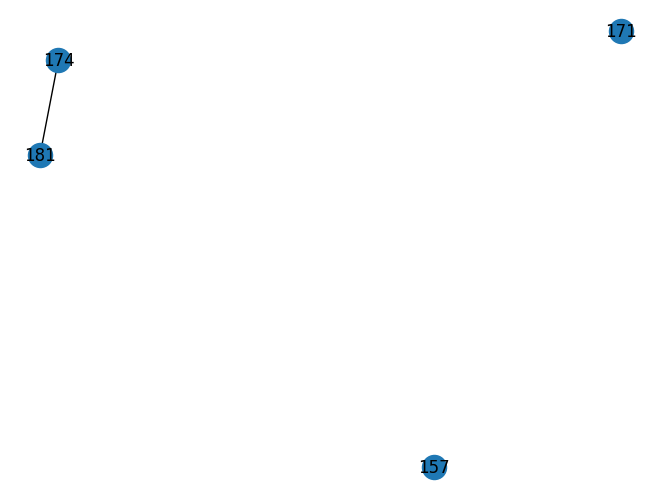

Performing node features query
Done with edge_df: 0.000728607177734375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    5.220111               0.025049   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    5.220111               0.025049   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  


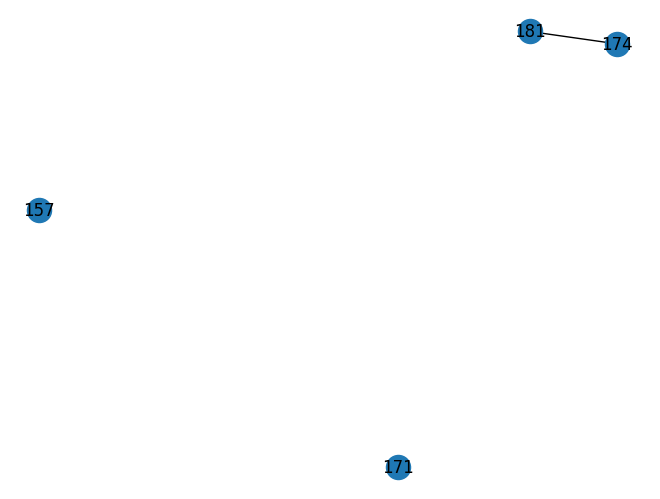

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1839.1475043627702 but max skip distance was 1839.1475043627702
Current node skip distance was 1511.0853901626754 but max skip distance was 1839.1475043627702
Current node skip distance was 1496.297961013633 but max skip distance was 1496.297961013633
Current node skip distance was 1708.0887522620742 but max skip distance was 1708.0887522620742
Current node skip distance was 1547.5571932935732 but max skip distance was 1708.0887522620742
Current node skip distance was 1756.2525218716528 but max skip distance was 1756.2525218716528
Current node skip distance was 1528.327643905881 but max skip distance was 1528.327643905881
Current node skip distance was 1443.4813042766386 but max skip distance was 1756.2525218716528
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 

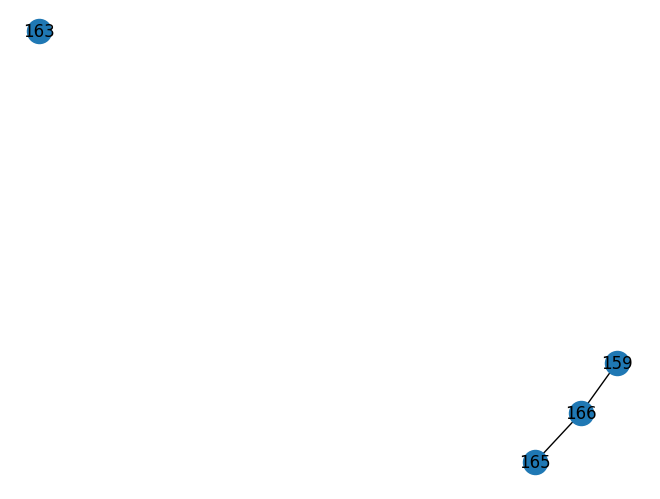

Performing global features query
Done with edge_df: 0.0007774829864501953
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.197348               0.159657   
1  166  165     62.35    3.027633               0.045573   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000117                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.197348               0.159657   
1  166  165     62.35    3.027633               0.045573   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029         

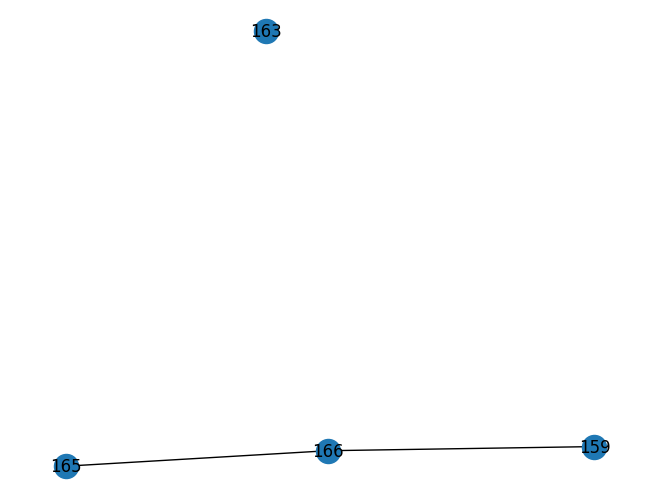

Performing node features query
Done with edge_df: 0.0007765293121337891
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.197348               0.159657   
1  166  165     62.35    3.027633               0.045573   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000117                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   True  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.197348               0.159657   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029      

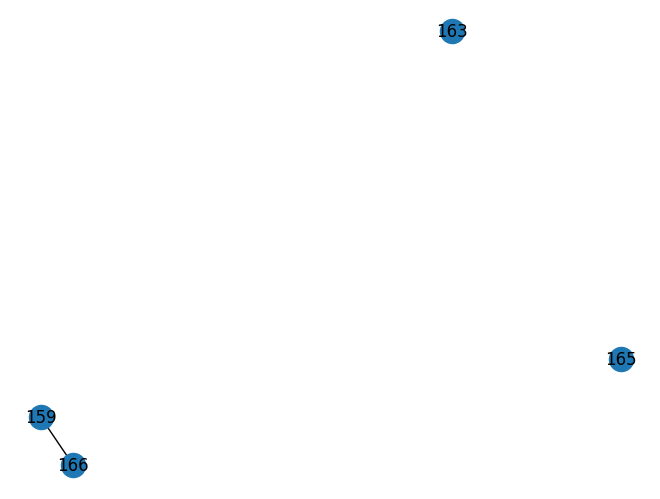

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1456.096439990625 but max skip distance was 1456.096439990625
Current node skip distance was 1438.7677292204708 but max skip distance was 1438.7677292204708
Current node skip distance was 1470.0260077208272 but max skip distance was 1823.5915015780708
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0016961097717285156
Performing Edge Query
After edge filter, # of rows = 6
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  165    150.60   12.675998               0.160229   
1  160  175      5.52   78.550450               0.992908   
2  160  168    145.72    6.305269               0.086603   
3  165  175     32.25   91.226447               1.373158   
4  1

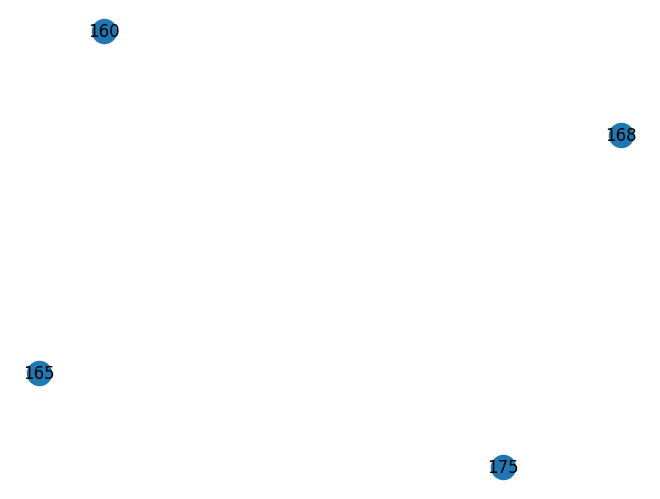

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1499.8793134527978 but max skip distance was 1499.8793134527978
Current node skip distance was 1620.256694044604 but max skip distance was 1620.256694044604
Current node skip distance was 1421.9516380715118 but max skip distance was 1496.297961013633
Current node skip distance was 2034.9736697669257 but max skip distance was 2300.0
Current node skip distance was 1823.5915015780708 but max skip distance was 1823.5915015780708
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010807514190673828
Performing Edge Query
After edge filter, # of rows = 6
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176 

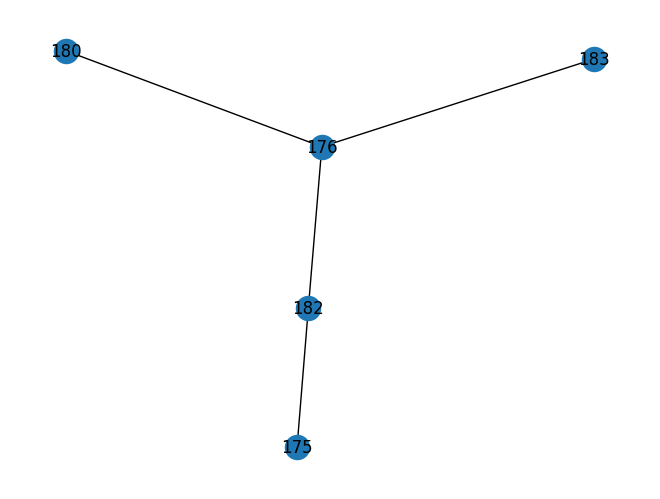

Performing global features query
Done with edge_df: 0.0008831024169921875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  182     54.70   44.139437               0.768864   
2  176  183      8.95    4.869116               0.084815   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
3       

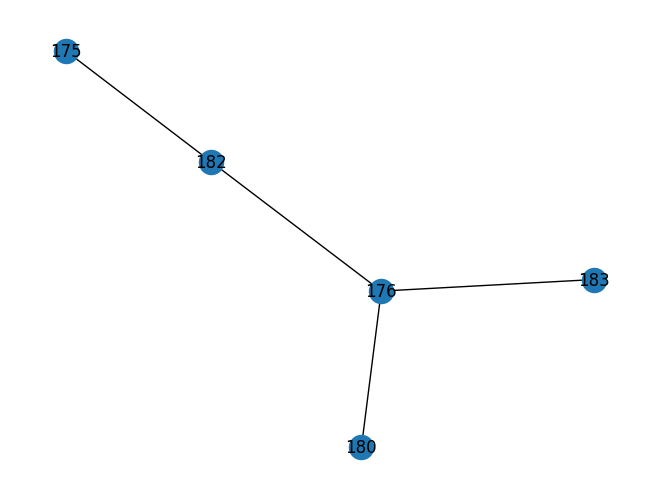

Performing node features query
Done with edge_df: 0.0008876323699951172
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  182     54.70   44.139437               0.768864   
2  176  183      8.95    4.869116               0.084815   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None   

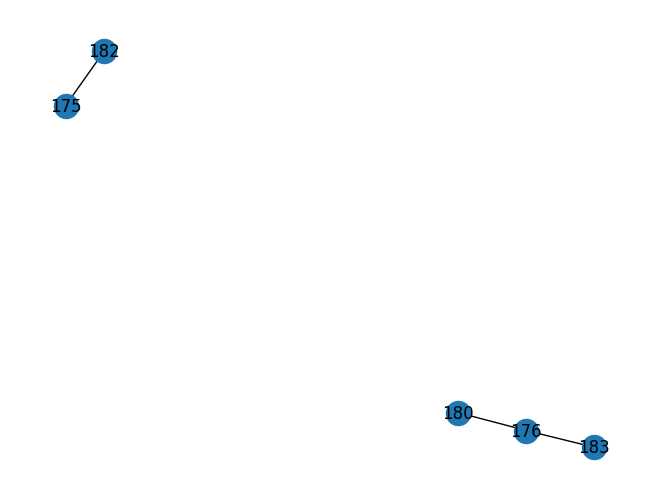

for upstream node 175, winning_node = 182, error_branches = [176 180 183]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1405.8692599063027 but max skip distance was 1405.8692599063027
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1667.7603974237397 but max skip distance was 1667.7603974237397
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010037422180175781
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   44.139437               0.768864   
1  176  183      8.95    4.869116               0.084815   
2  176  179    165.29   62.853873               0.522639   


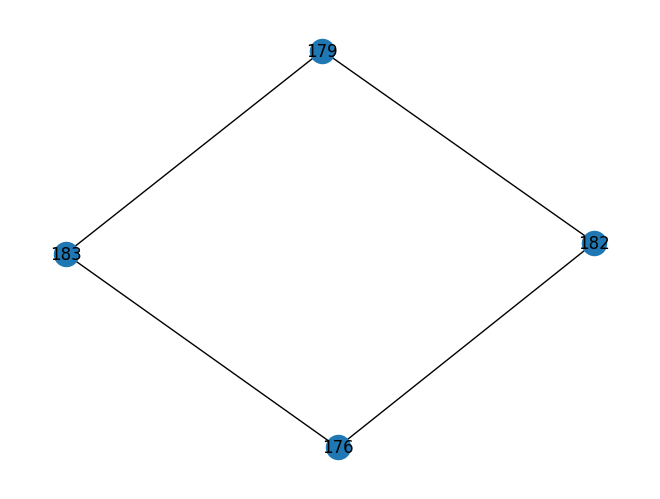

Performing global features query
Done with edge_df: 0.0008323192596435547
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   44.139437               0.768864   
1  176  183      8.95    4.869116               0.084815   
2  182  179     57.59   18.714436               0.155613   
3  183  179     22.87   67.722989               0.563126   

   synapse_density_diff  n_synapses_diff definite_partner_width_delete  \
0              0.000243                1                          True   
1              0.000000                0                         False   
2              0.000243                1                          None   
3              0.000000                0                          True   

  definite_partner_sk_delete  
0                       None  
1                       None  
2                       None  
3    

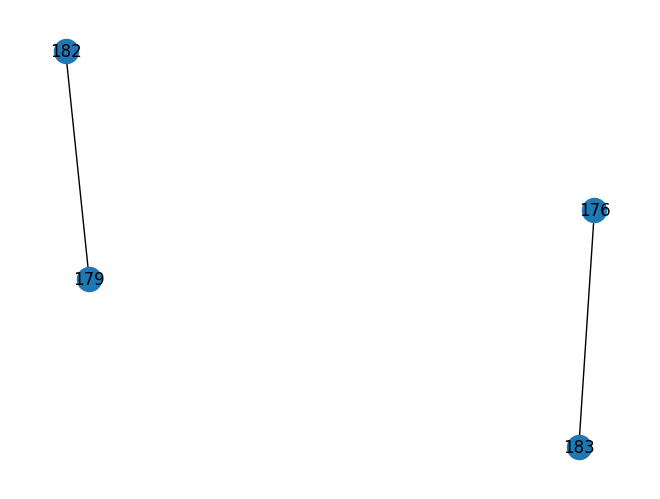

Performing node features query
Done with edge_df: 0.000766754150390625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    4.869116               0.084815   
1  182  179     57.59   18.714436               0.155613   

   synapse_density_diff  n_synapses_diff definite_partner_width_delete  \
0              0.000000                0                         False   
1              0.000243                1                          None   

  definite_partner_sk_delete above_threshold_delete  
0                       None                   None  
1                       None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    4.869116               0.084815   
1  182  179     57.59   18.714436               0.155613   

   synapse_density_diff  n_synapses_diff 

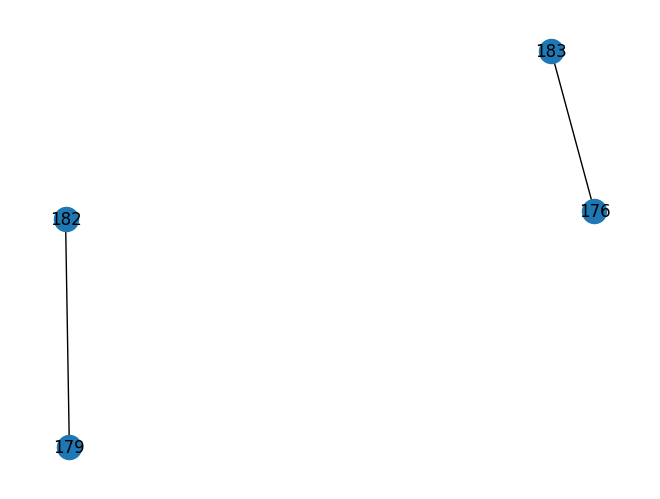

for upstream node 179, winning_node = 182, error_branches = [176 183]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (101.54805929174576) less than width_min(250)
Current node skip distance was 1428.0713915564047 but max skip distance was 1428.0713915564047
Current node skip distance was 2177.600147217678 but max skip distance was 2290.918145592637
Current node skip distance was 1589.7835803822734 but max skip distance was 1589.7835803822734
Current node skip distance was 1385.5812786224683 but max skip distance was 1385.5812786224683
Current node skip distance was 2098.655148218497 but max skip distance was 2098.655148218497
Current node skip distance was 1907.1869472675644 but max skip distance was 1907.1869472675644
limb_branch_dict_to_cancel = {'L3': array([105, 115, 102, 104, 145, 178, 147, 177, 150, 153, 156, 157, 152,
       173, 168, 167, 179, 182, 184, 185, 187, 189, 186, 188,  96,  65,
        64,  67,  71,  74,  77,  85,  88, 154, 155, 158, 161, 162

In [45]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [46]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)


Working on compartment basal---
Compartment limb stats = {'n_limbs': 4, 'soma_angle_max': 125.97, 'soma_angle_min': 90.34}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 29.77, 'soma_angle_min': 29.77}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 156.14, 'soma_angle_min': 156.14}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 5, 'soma_angle_max': 125.97, 'soma_angle_min': 29.77}


In [47]:
G_proof = neuron_obj_proof.neuron_graph_after_proof
G_proof

In [48]:
G_proof.nodes['S0']

{'area': 501.5465539695098,
 'compartment': 'soma',
 'mesh_center': array([ 553530.16919005,  749849.81538185, 1047455.00113064]),
 'endpoint_upstream': array([ 553530.16919005,  749849.81538185, 1047455.00113064]),
 'n_synapses': 53,
 'n_synapses_post': 52,
 'n_synapses_pre': 1,
 'sdf': 0.779125,
 'side_length_ratios': [1.0025436846486662,
  1.10048012354632,
  1.0976879515549238],
 'volume_ratio': 4.8422832831441704,
 'mesh_volume': 1083.0631353799831}

In [49]:
"""
Use max soma volume on the graph
"""

'\nUse max soma volume on the graph\n'

# Saving off the autoproofread neuron

In [50]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
    compressed=True,
)

Total time for soma meshes compression = 0.5445764064788818
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.3134119510650635
Total time for limb_meshes compression = 1.5697424411773682
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 9.3827645778656
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:139763142502768
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:139763142500944
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:139766612647600
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:139766612645344
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:139766612644960
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:139763131822528
Cleared mesh: <trimesh.Trimesh(vertices.s

'864691134917511946_auto_proof.pbz2'

In [ ]:
n_obj_proofread_recovered = vdi.load_neuron_obj_auto_proof(segment_id)

# Plotting the final neuron

In [ ]:
from neurd import synapse_utils as syu

In [ ]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [ ]:
nviz.plot_compartments(neuron_obj_proof)

In [ ]:
%load_ext autoreload
%autoreload 2